<a href="https://colab.research.google.com/github/MoqiSheng/MoqiSheng.github.io/blob/main/PISA_xgboost_optuna_shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!cp -r /content/drive/MyDrive/Country/Finland /content/Data/

In [3]:
!pip install pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 54.0 MB/s eta 0:00:00


In [4]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.1 MB/s eta 0:00:00


In [5]:
pip install --upgrade xgboost

In [6]:
pip install --upgrade scikit-learn xgboost

Filtered data shape: (3358, 34)
     ESCS  RELATST  BELONG  BULLIED  FEELSAFE  SCHRISK  PERSEVAGR  CURIOAGR  \
0  0.8261   1.2437 -0.0437  -0.2016    1.1246   0.1810     0.4540    0.3058   
1 -1.0357   0.7190 -0.6137  -1.2280    0.4417  -0.6386    -0.4017   -0.6563   
2 -0.9606  -0.2194 -1.1147  -1.2280   -0.7560  -0.6386     0.5617    0.1778   
3 -0.0154  -1.0841 -0.7185   1.0692    0.0936   0.1810     0.4375    0.0134   
4  1.1558  -0.3538 -0.9290   0.8814    1.1246  -0.6386     0.8254    2.0864   

   COOPAGR  EMPATAGR  ...  ICTSUBJ  ICTENQ  ICTFEED  ICTOUT  ICTWKDY  \
0   0.1187    0.1290  ...   0.5048  0.3109   0.4297 -0.8080   0.4182   
1  -0.6986   -0.2087  ...   0.9454 -0.1658  -0.4292  0.1088  -0.3710   
2   0.0849   -0.1344  ...  -2.0101  0.3109  -0.6744 -1.2894  -0.5032   
3  -0.7118   -1.2602  ...   0.5918 -0.0210  -0.3548 -0.4834  -0.2504   
4  -1.3496    1.2934  ...   0.7732  0.3744   2.9420  2.9804  -0.5555   

   ICTWKEND  ICTREG  ICTINFO  ICTEFFIC  PV1CRTH_NC  
0    0.

<ipython-input-17-b7e1cbe902b2>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[columns_with_missing] = knn_imputer.fit_transform(df_filtered[columns_with_missing])
[I 2024-12-19 08:07:05,859] A new study created in memory with name: no-name-47a3cf1c-1ceb-49f6-b7fc-6e37f14fae06


Missing after KNN imputation:
ESCS          0
RELATST       0
BELONG        0
BULLIED       0
FEELSAFE      0
SCHRISK       0
PERSEVAGR     0
CURIOAGR      0
COOPAGR       0
EMPATAGR      0
ASSERAGR      0
STRESAGR      0
EMOCOAGR      0
GROSAGR       0
FAMSUP        0
CREATEFF      0
CREATSCH      0
CREATFAM      0
CREATAS       0
CREATOOS      0
CREATOP       0
ICTSCH        0
ICTHOME       0
ICTQUAL       0
ICTSUBJ       0
ICTENQ        0
ICTFEED       0
ICTOUT        0
ICTWKDY       0
ICTWKEND      0
ICTREG        0
ICTINFO       0
ICTEFFIC      0
PV1CRTH_NC    0
dtype: int64
Training set shape: (2686, 33)
Test set shape: (672, 33)


[I 2024-12-19 08:07:09,654] Trial 0 finished with value: 0.2678649639003094 and parameters: {'n_estimators': 741, 'max_depth': 7, 'learning_rate': 0.08454472053864363, 'subsample': 0.8378606059239887, 'colsample_bytree': 0.7420835077342184, 'alpha': 0.0579086491599104, 'lambda': 0.06591434711594657, 'min_child_weight': 4, 'gamma': 0.016179468117740736}. Best is trial 0 with value: 0.2678649639003094.
[I 2024-12-19 08:07:13,173] Trial 1 finished with value: -0.2745068122668396 and parameters: {'n_estimators': 1928, 'max_depth': 11, 'learning_rate': 0.9563281065308356, 'subsample': 0.8215900617962661, 'colsample_bytree': 0.6276546057394908, 'alpha': 0.07979922202222259, 'lambda': 0.051701673182341513, 'min_child_weight': 1, 'gamma': 0.03952746772610416}. Best is trial 0 with value: 0.2678649639003094.
[I 2024-12-19 08:07:14,767] Trial 2 finished with value: 0.162818954449143 and parameters: {'n_estimators': 1457, 'max_depth': 5, 'learning_rate': 0.7258542046327258, 'subsample': 0.7126737

Best hyperparameters: {'n_estimators': 538, 'max_depth': 16, 'learning_rate': 0.013318463672448525, 'subsample': 0.752978390226394, 'colsample_bytree': 0.8362116976922677, 'alpha': 0.038779263061876526, 'lambda': 0.052360952328009504, 'min_child_weight': 5, 'gamma': 0.3127982834605117}
Best R²: 0.28416657508431514
MSE on test set with tuned model: 72.2629474910147
R² on test set with tuned model: 0.28824592743413857


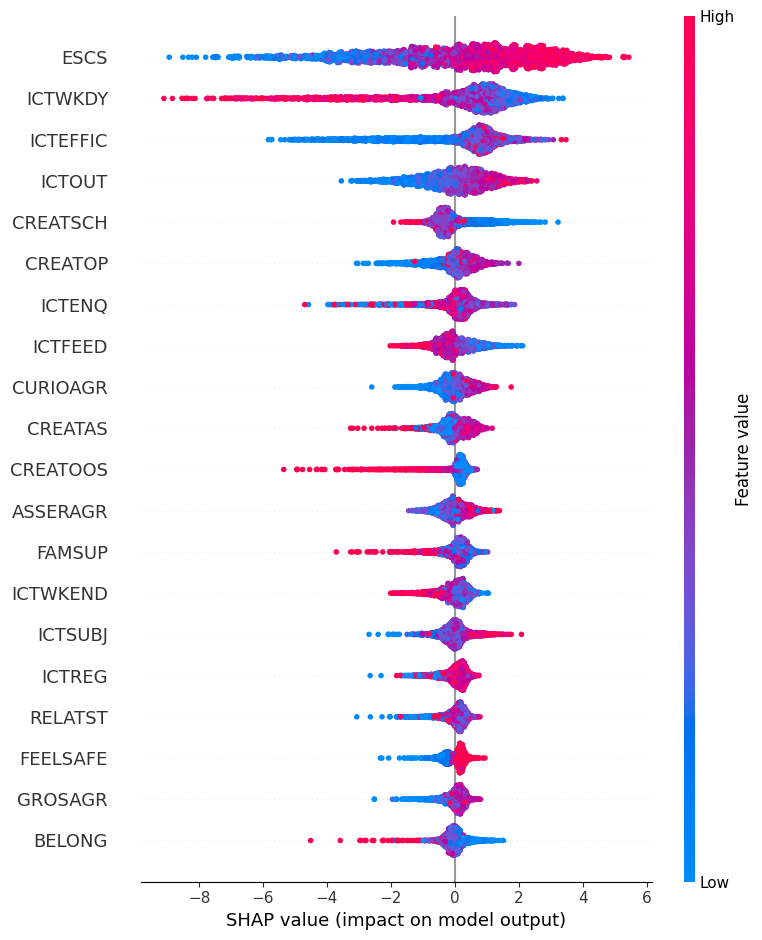

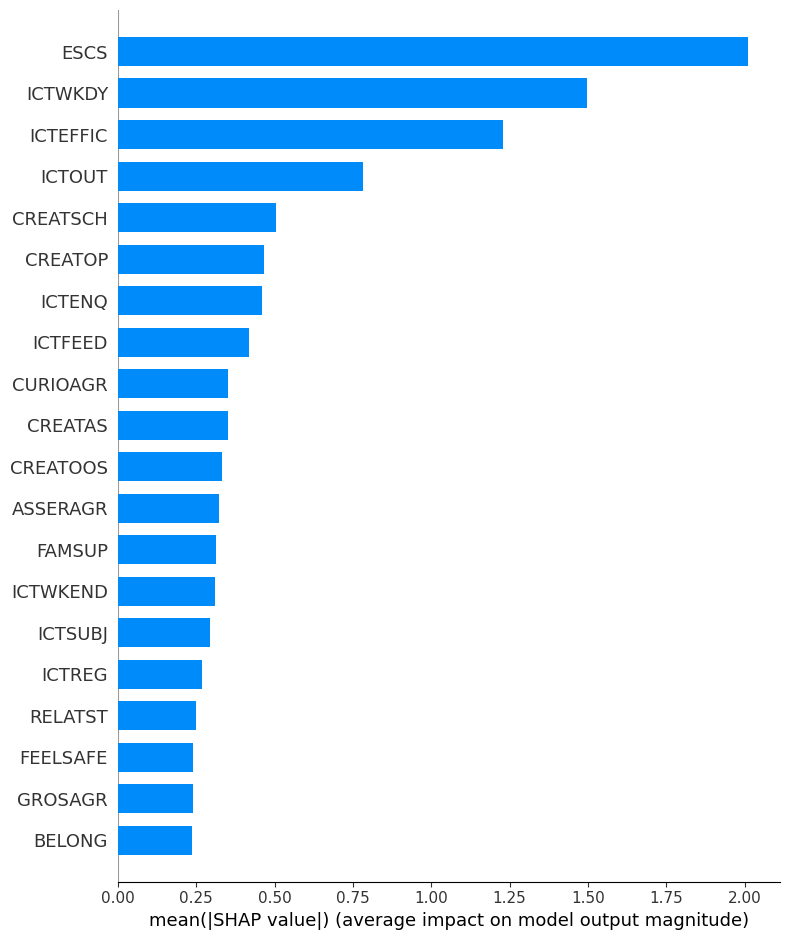

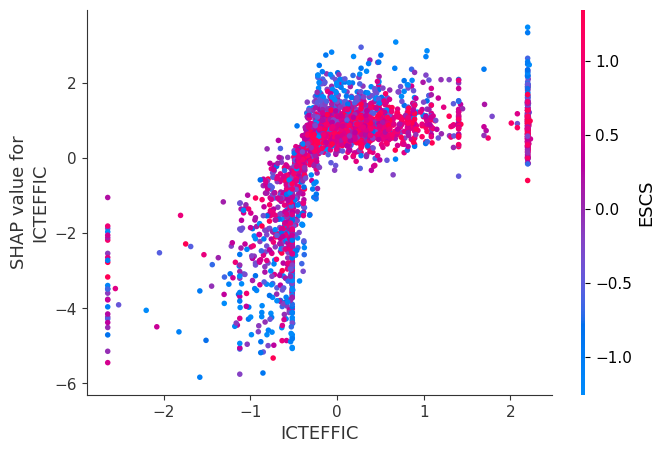

In [17]:
import pyreadstat
import pandas as pd
import os
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer
import numpy as np
import shap
import optuna
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import pickle

# Step 1: 定义文件名和变量列表
'''
abspath = os.path.abspath(__file__)
dname = os.path.dirname(abspath)
os.chdir(dname)
'''
sav_filename = "./Data/Singapore/Singapore_Male.sav"

variables_of_interest = [
    "ESCS", "RELATST", "BELONG", "BULLIED", "FEELSAFE", "SCHRISK", "PERSEVAGR",
    "CURIOAGR", "COOPAGR", "EMPATAGR", "ASSERAGR", "STRESAGR", "EMOCOAGR", "GROSAGR",
    "FAMSUP", "CREATEFF", "CREATSCH", "CREATFAM", "CREATAS", "CREATOOS", "CREATOP",
    "ICTSCH", "ICTHOME", "ICTQUAL", "ICTSUBJ", "ICTENQ", "ICTFEED", "ICTOUT", "ICTWKDY",
    "ICTWKEND", "ICTREG", "ICTINFO", "ICTEFFIC"
]

target_variable = "PV1CRTH_NC"

# Step 2: 读取数据
df, meta = pyreadstat.read_sav(sav_filename)

selected_columns = variables_of_interest + [target_variable]
missing_columns = [col for col in selected_columns if col not in df.columns]

if len(missing_columns) > 0:
    print("Missing columns:", missing_columns)
else:
    df_filtered = df[selected_columns]
    print("Filtered data shape:", df_filtered.shape)
    print(df_filtered.head())
    print(df_filtered.isnull().sum())

    # Step 4: 缺失值处理
    missing_counts = df_filtered.isnull().sum()

    # 计算总数据的 20%
    total_rows = df_filtered.shape[0]
    threshold = total_rows * 0.2  # 20%的阈值

    # 删除缺失值超过总数据 20% 的列
    cols_to_drop = missing_counts[missing_counts > threshold].index.tolist()
    if len(cols_to_drop) > 0:
        print("Dropping columns with more than 20% missing values:", cols_to_drop)
        df_filtered = df_filtered.drop(columns=cols_to_drop)
    else:
        print("No columns dropped.")

    print("Missing after drop:")
    print(df_filtered.isnull().sum())

    # 对剩余的缺失值进行 KNN 插补
    remaining_missing = df_filtered.isnull().sum()
    columns_with_missing = remaining_missing[remaining_missing > 0].index

    # 创建 KNN 插补器，n_neighbors 参数指定使用多少个邻居进行插补
    knn_imputer = KNNImputer(n_neighbors=5)

    # 对缺失值进行插补
    df_filtered[columns_with_missing] = knn_imputer.fit_transform(df_filtered[columns_with_missing])

    print("Missing after KNN imputation:")
    print(df_filtered.isnull().sum())

    # Step 5: 划分数据集
    X = df_filtered.drop(columns=[target_variable])
    y = df_filtered[target_variable]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Training set shape:", X_train.shape)
    print("Test set shape:", X_test.shape)

    # **新增** 使用手动交叉验证和Optuna对XGBoost进行超参数调优
    def objective(trial):
        # 定义贝叶斯优化的超参数空间
        param = {
            'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
            'max_depth': trial.suggest_int('max_depth', 5, 25),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
            'subsample': trial.suggest_float('subsample', 0.5, 0.9),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 0.9),
            'alpha': trial.suggest_float('alpha', 0, 0.1),
            'lambda': trial.suggest_float('lambda', 0, 0.1),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
            'gamma': trial.suggest_float('gamma', 0, 0.5),
            'device': 'cuda',  # 使用CUDA设备
            'eval_metric': 'rmse',  # 初始化时指定评估指标
            'early_stopping_rounds': 50
        }

        model = XGBRegressor(**param)

        # 手动进行交叉验证
        kf = KFold(n_splits=10, shuffle=True, random_state=42)
        r2_scores = []

        for train_idx, val_idx in kf.split(X_train):
            X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

            model.fit(X_train_cv, y_train_cv, eval_set=[(X_val_cv, y_val_cv)], verbose=False)
            y_pred = model.predict(X_val_cv)
            r2_scores.append(r2_score(y_val_cv, y_pred))

        return np.mean(r2_scores)

    # 创建并运行Optuna优化，目标是最大化R²
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100)

    print("Best hyperparameters:", study.best_params)
    print("Best R²:", study.best_value)

    # 获取最佳超参数并训练最佳模型
    best_params = study.best_params
    best_model = XGBRegressor(**best_params)
    best_model.fit(X_train, y_train)

    # 使用最佳模型在测试集评估
    y_pred = best_model.predict(X_test)

    # 计算测试集上的MSE和R²
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("MSE on test set with tuned model:", mse)
    print("R² on test set with tuned model:", r2)

    # 保存最佳模型
    with open('Singapore_Male.pkl', 'wb') as f:
      pickle.dump(best_model, f)

    # Step 6: SHAP分析
    '''
    feature_name_map = {
        "ESCS": "Index of economic, social and cultural status",
        "RELATST": "Quality of student-teacher relationships",
        "BELONG": "Sense of belonging",
        "BULLIED": "Being bullied",
        "FEELSAFE": "Feeling safe",
        "SCHRISK": "School safety risks",
        "PERSEVAGR": "Perseverance (agreement) (WLE)",
        "CURIOAGR": "Curiosity (agreement) (WLE)",
        "COOPAGR": "Cooperation (agreement) (WLE)",
        "EMPATAGR": "Empathy (agreement) (WLE)",
        "ASSERAGR": "Assertiveness (agreement) (WLE)",
        "STRESAGR": "Stress resistance (agreement) (WLE)",
        "EMOCOAGR": "Emotional control (agreement) (WLE)",
        "GROSAGR": "Growth Mindset (WLE)",
        "FAMSUP": "Family support (WLE)",
        "CREATEFF": "Creative self-efficacy (WLE)",
        "CREATSCH": "Creative school and class environment (WLE)",
        "CREATFAM": "Creative peers and family environment (WLE)",
        "CREATAS": "Creative Activities at school (WLE)",
        "CREATOOS": "Creative Activities outside of school (WLE)",
        "CREATOP": "Creativity and Openness to Intellect TBD (WLE)",
        "ICTSCH": "ICT availability at school (WLE)",
        "ICTHOME": "ICT availability outside of school (WLE)",
        "ICTQUAL": "Quality of access to ICT (WLE)",
        "ICTSUBJ": "Subject-related ICT Use During Lessons (WLE)",
        "ICTENQ": "Use of ICT in enquiry-based learning activities (WLE)",
        "ICTFEED": "Support or feedback via ICT (WLE)",
        "ICTOUT": "Use of ICT for school activities outside of the classroom (WLE)",
        "ICTWKDY": "Frequency of ICT activity (weekday) (WLE)",
        "ICTWKEND": "Frequency of ICT activity (weekend) (WLE)",
        "ICTREG": "Views of regulated ICT use in school (WLE)",
        "ICTINFO": "Students’ practices regarding online information (WLE)",
        "ICTEFFIC": "Self-efficacy in digital competencies (WLE)"
    }
    '''

    # 将数据集列名映射为详细描述
    # X_train_renamed = X_train.rename(columns=feature_name_map)

    # 基于训练好的最优模型进行SHAP值分析
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_train)

    # 全局特征重要度可视化 (summary_plot)
    shap.summary_plot(shap_values, X_train, plot_type="dot")

    # 展示特征重要性 (bar plot)
    shap.summary_plot(shap_values, X_train, plot_type="bar")

    # 查看单个特征的依赖关系图
    shap.dependence_plot("ICTEFFIC", shap_values, X_train)


Filtered data shape: (3248, 34)
     ESCS  RELATST  BELONG  BULLIED  FEELSAFE  SCHRISK  PERSEVAGR  CURIOAGR  \
0  0.1836  -0.2606  0.2442  -1.2280   -0.7560  -0.6386     0.4369    2.7951   
1  0.0856   1.0726  2.1143  -1.2280    1.1246  -0.6386    -0.5954    0.3406   
2  0.1268   1.1296  0.5159  -1.2280    0.1413   0.1810    -0.1554    0.3247   
3  1.4654   2.2314 -0.1551  -0.1325    1.1246  -0.6386    -0.3870   -0.0028   
4  0.8799   2.7900  2.1143  -1.2280    1.1246  -0.6386     1.3569    1.4772   

   COOPAGR  EMPATAGR  ...  ICTSUBJ  ICTENQ  ICTFEED  ICTOUT  ICTWKDY  \
0  -0.0319    1.3979  ...  -0.1315 -0.3767  -0.4038  0.2260  -0.4469   
1   0.8806   -0.5172  ...   0.6775  1.0316   0.2776  2.9804   1.3145   
2   4.8203   -0.5881  ...   0.6012 -0.0477   0.9257  0.3464   0.4565   
3   2.4757    3.1908  ...   0.4382  0.3177   0.3634  1.2871  -0.8137   
4   1.7675    2.2624  ...   0.0251  1.4244   1.4402  1.8005   0.0615   

   ICTWKEND  ICTREG  ICTINFO  ICTEFFIC  PV1CRTH_NC  
0   -0.

<ipython-input-18-f176d5a48d04>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[columns_with_missing] = knn_imputer.fit_transform(df_filtered[columns_with_missing])
[I 2024-12-19 08:37:18,401] A new study created in memory with name: no-name-d183401f-824e-494b-9b2c-45338188dffb


Missing after KNN imputation:
ESCS          0
RELATST       0
BELONG        0
BULLIED       0
FEELSAFE      0
SCHRISK       0
PERSEVAGR     0
CURIOAGR      0
COOPAGR       0
EMPATAGR      0
ASSERAGR      0
STRESAGR      0
EMOCOAGR      0
GROSAGR       0
FAMSUP        0
CREATEFF      0
CREATSCH      0
CREATFAM      0
CREATAS       0
CREATOOS      0
CREATOP       0
ICTSCH        0
ICTHOME       0
ICTQUAL       0
ICTSUBJ       0
ICTENQ        0
ICTFEED       0
ICTOUT        0
ICTWKDY       0
ICTWKEND      0
ICTREG        0
ICTINFO       0
ICTEFFIC      0
PV1CRTH_NC    0
dtype: int64
Training set shape: (2598, 33)
Test set shape: (650, 33)


[I 2024-12-19 08:37:20,605] Trial 0 finished with value: 0.25942777827067026 and parameters: {'n_estimators': 1255, 'max_depth': 6, 'learning_rate': 0.21626665914385215, 'subsample': 0.7203716822767849, 'colsample_bytree': 0.8817047681125463, 'alpha': 0.05115431292692962, 'lambda': 0.0395920737171645, 'min_child_weight': 5, 'gamma': 0.02792414557574696}. Best is trial 0 with value: 0.25942777827067026.
[I 2024-12-19 08:37:22,743] Trial 1 finished with value: 0.041561157200108535 and parameters: {'n_estimators': 1275, 'max_depth': 8, 'learning_rate': 0.7194442628633354, 'subsample': 0.7801699093313326, 'colsample_bytree': 0.655066172452807, 'alpha': 0.02045511134837389, 'lambda': 0.08366435592085654, 'min_child_weight': 2, 'gamma': 0.4525328881932977}. Best is trial 0 with value: 0.25942777827067026.
[I 2024-12-19 08:37:26,605] Trial 2 finished with value: -0.4862484533534568 and parameters: {'n_estimators': 1096, 'max_depth': 20, 'learning_rate': 0.9978716226943519, 'subsample': 0.6800

Best hyperparameters: {'n_estimators': 905, 'max_depth': 5, 'learning_rate': 0.01192117912959207, 'subsample': 0.724107924290699, 'colsample_bytree': 0.832353452339094, 'alpha': 0.0361892688864611, 'lambda': 0.003970575264676486, 'min_child_weight': 5, 'gamma': 0.09081417310602559}
Best R²: 0.3110135334327156
MSE on test set with tuned model: 55.320973776656054
R² on test set with tuned model: 0.26556210784406054


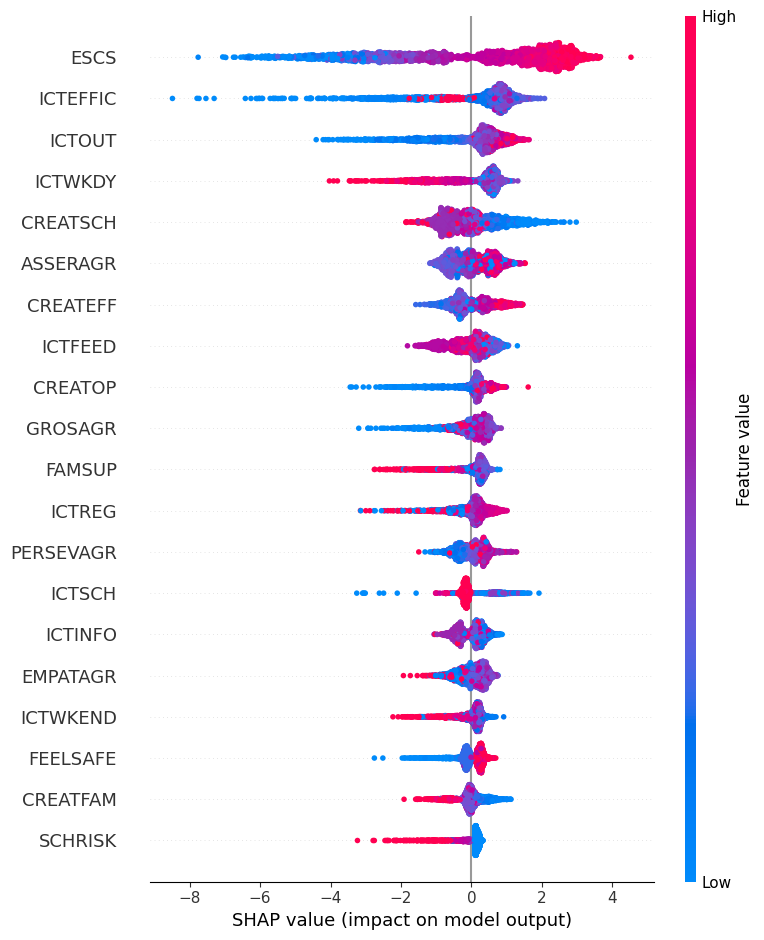

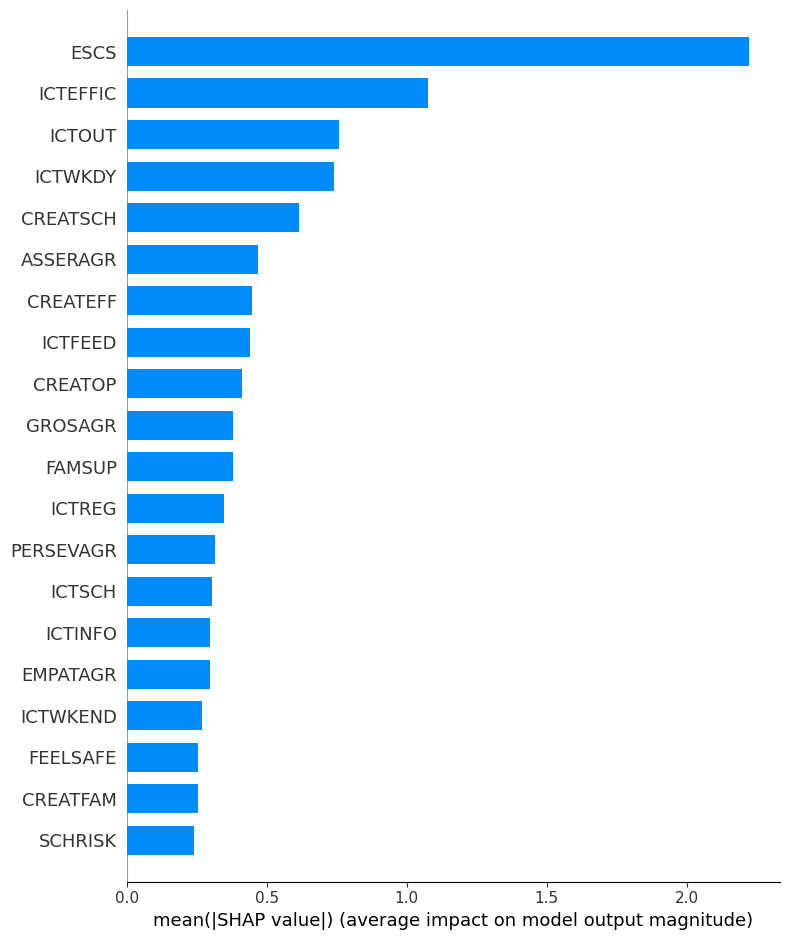

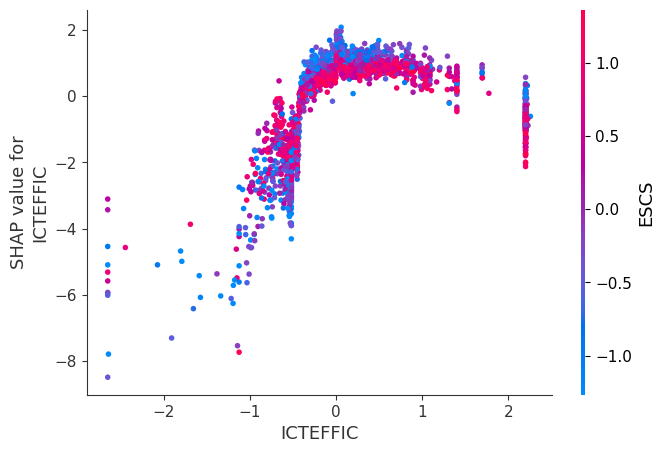

In [18]:
import pyreadstat
import pandas as pd
import os
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer
import numpy as np
import shap
import optuna
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import pickle

# Step 1: 定义文件名和变量列表
'''
abspath = os.path.abspath(__file__)
dname = os.path.dirname(abspath)
os.chdir(dname)
'''
sav_filename = "./Data/Singapore/Singapore_Female.sav"

variables_of_interest = [
    "ESCS", "RELATST", "BELONG", "BULLIED", "FEELSAFE", "SCHRISK", "PERSEVAGR",
    "CURIOAGR", "COOPAGR", "EMPATAGR", "ASSERAGR", "STRESAGR", "EMOCOAGR", "GROSAGR",
    "FAMSUP", "CREATEFF", "CREATSCH", "CREATFAM", "CREATAS", "CREATOOS", "CREATOP",
    "ICTSCH", "ICTHOME", "ICTQUAL", "ICTSUBJ", "ICTENQ", "ICTFEED", "ICTOUT", "ICTWKDY",
    "ICTWKEND", "ICTREG", "ICTINFO", "ICTEFFIC"
]

target_variable = "PV1CRTH_NC"

# Step 2: 读取数据
df, meta = pyreadstat.read_sav(sav_filename)

selected_columns = variables_of_interest + [target_variable]
missing_columns = [col for col in selected_columns if col not in df.columns]

if len(missing_columns) > 0:
    print("Missing columns:", missing_columns)
else:
    df_filtered = df[selected_columns]
    print("Filtered data shape:", df_filtered.shape)
    print(df_filtered.head())
    print(df_filtered.isnull().sum())

    # Step 4: 缺失值处理
    missing_counts = df_filtered.isnull().sum()

    # 计算总数据的 20%
    total_rows = df_filtered.shape[0]
    threshold = total_rows * 0.2  # 20%的阈值

    # 删除缺失值超过总数据 20% 的列
    cols_to_drop = missing_counts[missing_counts > threshold].index.tolist()
    if len(cols_to_drop) > 0:
        print("Dropping columns with more than 20% missing values:", cols_to_drop)
        df_filtered = df_filtered.drop(columns=cols_to_drop)
    else:
        print("No columns dropped.")

    print("Missing after drop:")
    print(df_filtered.isnull().sum())

    # 对剩余的缺失值进行 KNN 插补
    remaining_missing = df_filtered.isnull().sum()
    columns_with_missing = remaining_missing[remaining_missing > 0].index

    # 创建 KNN 插补器，n_neighbors 参数指定使用多少个邻居进行插补
    knn_imputer = KNNImputer(n_neighbors=5)

    # 对缺失值进行插补
    df_filtered[columns_with_missing] = knn_imputer.fit_transform(df_filtered[columns_with_missing])

    print("Missing after KNN imputation:")
    print(df_filtered.isnull().sum())

    # Step 5: 划分数据集
    X = df_filtered.drop(columns=[target_variable])
    y = df_filtered[target_variable]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Training set shape:", X_train.shape)
    print("Test set shape:", X_test.shape)

    # **新增** 使用手动交叉验证和Optuna对XGBoost进行超参数调优
    def objective(trial):
        # 定义贝叶斯优化的超参数空间
        param = {
            'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
            'max_depth': trial.suggest_int('max_depth', 5, 25),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
            'subsample': trial.suggest_float('subsample', 0.5, 0.9),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 0.9),
            'alpha': trial.suggest_float('alpha', 0, 0.1),
            'lambda': trial.suggest_float('lambda', 0, 0.1),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
            'gamma': trial.suggest_float('gamma', 0, 0.5),
            'device': 'cuda',  # 使用CUDA设备
            'eval_metric': 'rmse',  # 初始化时指定评估指标
            'early_stopping_rounds': 50
        }

        model = XGBRegressor(**param)

        # 手动进行交叉验证
        kf = KFold(n_splits=10, shuffle=True, random_state=42)
        r2_scores = []

        for train_idx, val_idx in kf.split(X_train):
            X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

            model.fit(X_train_cv, y_train_cv, eval_set=[(X_val_cv, y_val_cv)], verbose=False)
            y_pred = model.predict(X_val_cv)
            r2_scores.append(r2_score(y_val_cv, y_pred))

        return np.mean(r2_scores)

    # 创建并运行Optuna优化，目标是最大化R²
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100)

    print("Best hyperparameters:", study.best_params)
    print("Best R²:", study.best_value)

    # 获取最佳超参数并训练最佳模型
    best_params = study.best_params
    best_model = XGBRegressor(**best_params)
    best_model.fit(X_train, y_train)

    # 使用最佳模型在测试集评估
    y_pred = best_model.predict(X_test)

    # 计算测试集上的MSE和R²
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("MSE on test set with tuned model:", mse)
    print("R² on test set with tuned model:", r2)

    # 保存最佳模型
    with open('Singapore_Female.pkl', 'wb') as f:
      pickle.dump(best_model, f)

    # Step 6: SHAP分析
    '''
    feature_name_map = {
        "ESCS": "Index of economic, social and cultural status",
        "RELATST": "Quality of student-teacher relationships",
        "BELONG": "Sense of belonging",
        "BULLIED": "Being bullied",
        "FEELSAFE": "Feeling safe",
        "SCHRISK": "School safety risks",
        "PERSEVAGR": "Perseverance (agreement) (WLE)",
        "CURIOAGR": "Curiosity (agreement) (WLE)",
        "COOPAGR": "Cooperation (agreement) (WLE)",
        "EMPATAGR": "Empathy (agreement) (WLE)",
        "ASSERAGR": "Assertiveness (agreement) (WLE)",
        "STRESAGR": "Stress resistance (agreement) (WLE)",
        "EMOCOAGR": "Emotional control (agreement) (WLE)",
        "GROSAGR": "Growth Mindset (WLE)",
        "FAMSUP": "Family support (WLE)",
        "CREATEFF": "Creative self-efficacy (WLE)",
        "CREATSCH": "Creative school and class environment (WLE)",
        "CREATFAM": "Creative peers and family environment (WLE)",
        "CREATAS": "Creative Activities at school (WLE)",
        "CREATOOS": "Creative Activities outside of school (WLE)",
        "CREATOP": "Creativity and Openness to Intellect TBD (WLE)",
        "ICTSCH": "ICT availability at school (WLE)",
        "ICTHOME": "ICT availability outside of school (WLE)",
        "ICTQUAL": "Quality of access to ICT (WLE)",
        "ICTSUBJ": "Subject-related ICT Use During Lessons (WLE)",
        "ICTENQ": "Use of ICT in enquiry-based learning activities (WLE)",
        "ICTFEED": "Support or feedback via ICT (WLE)",
        "ICTOUT": "Use of ICT for school activities outside of the classroom (WLE)",
        "ICTWKDY": "Frequency of ICT activity (weekday) (WLE)",
        "ICTWKEND": "Frequency of ICT activity (weekend) (WLE)",
        "ICTREG": "Views of regulated ICT use in school (WLE)",
        "ICTINFO": "Students’ practices regarding online information (WLE)",
        "ICTEFFIC": "Self-efficacy in digital competencies (WLE)"
    }
    '''

    # 将数据集列名映射为详细描述
    # X_train_renamed = X_train.rename(columns=feature_name_map)

    # 基于训练好的最优模型进行SHAP值分析
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_train)

    # 全局特征重要度可视化 (summary_plot)
    shap.summary_plot(shap_values, X_train, plot_type="dot")

    # 展示特征重要性 (bar plot)
    shap.summary_plot(shap_values, X_train, plot_type="bar")

    # 查看单个特征的依赖关系图
    shap.dependence_plot("ICTEFFIC", shap_values, X_train)

Filtered data shape: (6454, 34)
     ESCS  RELATST  BELONG  BULLIED  FEELSAFE  SCHRISK  PERSEVAGR  CURIOAGR  \
0  0.4168   1.2586  2.4581  -1.2280    1.1246  -0.6386    -0.4897    0.8647   
1  1.2884  -0.7982  0.7289  -1.2280    1.1246  -0.6386    -0.1105   -0.5983   
2  0.4107   1.0128 -0.5636  -1.2280   -0.0918   0.1810     0.0456   -1.1632   
3  0.2030  -0.4010 -0.1988  -1.2280    1.1246  -0.6386    -0.2694   -0.6783   
4 -0.4307  -0.7958 -0.3485  -0.1325   -0.7560  -0.6386    -0.8069    0.0565   

   COOPAGR  EMPATAGR  ...  ICTSUBJ  ICTENQ  ICTFEED  ICTOUT  ICTWKDY  \
0   0.0823   -0.1419  ...  -0.8257 -2.3763  -1.6286 -2.6018   0.4639   
1   0.5526   -0.4662  ...  -1.1559  0.3109  -0.5112  2.9804  -0.2585   
2   2.1694    0.1874  ...  -0.1588 -0.3584   0.3074  0.1180   0.4639   
3  -0.6274   -0.1899  ...   1.9500 -0.7786  -1.6286 -2.6018  -0.1845   
4  -0.9088   -0.4784  ...  -0.3500 -0.0822  -0.2822  0.9468  -0.3542   

   ICTWKEND  ICTREG  ICTINFO  ICTEFFIC  PV1CRTH_NC  
0    0.

<ipython-input-8-621adbc71dac>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[columns_with_missing] = knn_imputer.fit_transform(df_filtered[columns_with_missing])
[I 2024-12-19 11:22:43,362] A new study created in memory with name: no-name-8863ea3e-b21a-46b8-8f63-68c371a58e02


Missing after KNN imputation:
ESCS          0
RELATST       0
BELONG        0
BULLIED       0
FEELSAFE      0
SCHRISK       0
PERSEVAGR     0
CURIOAGR      0
COOPAGR       0
EMPATAGR      0
ASSERAGR      0
STRESAGR      0
EMOCOAGR      0
GROSAGR       0
FAMSUP        0
CREATEFF      0
CREATSCH      0
CREATFAM      0
CREATAS       0
CREATOOS      0
CREATOP       0
ICTSCH        0
ICTHOME       0
ICTQUAL       0
ICTSUBJ       0
ICTENQ        0
ICTFEED       0
ICTOUT        0
ICTWKDY       0
ICTWKEND      0
ICTREG        0
ICTINFO       0
ICTEFFIC      0
PV1CRTH_NC    0
dtype: int64
Training set shape: (5163, 33)
Test set shape: (1291, 33)


[I 2024-12-19 11:22:53,163] Trial 0 finished with value: 0.2407511463668266 and parameters: {'n_estimators': 551, 'max_depth': 9, 'learning_rate': 0.04009756320884082, 'subsample': 0.7465757746606534, 'colsample_bytree': 0.8089776057878223, 'alpha': 0.05534956819149294, 'lambda': 0.03081025023656793, 'min_child_weight': 3, 'gamma': 0.2141457606030726}. Best is trial 0 with value: 0.2407511463668266.
[I 2024-12-19 11:22:56,064] Trial 1 finished with value: 0.10790536997752423 and parameters: {'n_estimators': 1361, 'max_depth': 6, 'learning_rate': 0.7280291645583051, 'subsample': 0.6883975486705021, 'colsample_bytree': 0.6768263910639065, 'alpha': 0.0531116342409641, 'lambda': 0.048026879938516176, 'min_child_weight': 1, 'gamma': 0.2654661657901727}. Best is trial 0 with value: 0.2407511463668266.
[I 2024-12-19 11:23:01,973] Trial 2 finished with value: -0.1208688958506502 and parameters: {'n_estimators': 1004, 'max_depth': 18, 'learning_rate': 0.78094030001746, 'subsample': 0.5024043585

Best hyperparameters: {'n_estimators': 738, 'max_depth': 5, 'learning_rate': 0.02971535554618492, 'subsample': 0.6520196423473507, 'colsample_bytree': 0.7029796168290119, 'alpha': 0.08459950980406818, 'lambda': 0.003028471097337892, 'min_child_weight': 1, 'gamma': 0.29667313572199}
Best R²: 0.2697358734361551
MSE on test set with tuned model: 73.913694402418
R² on test set with tuned model: 0.2980295989305718


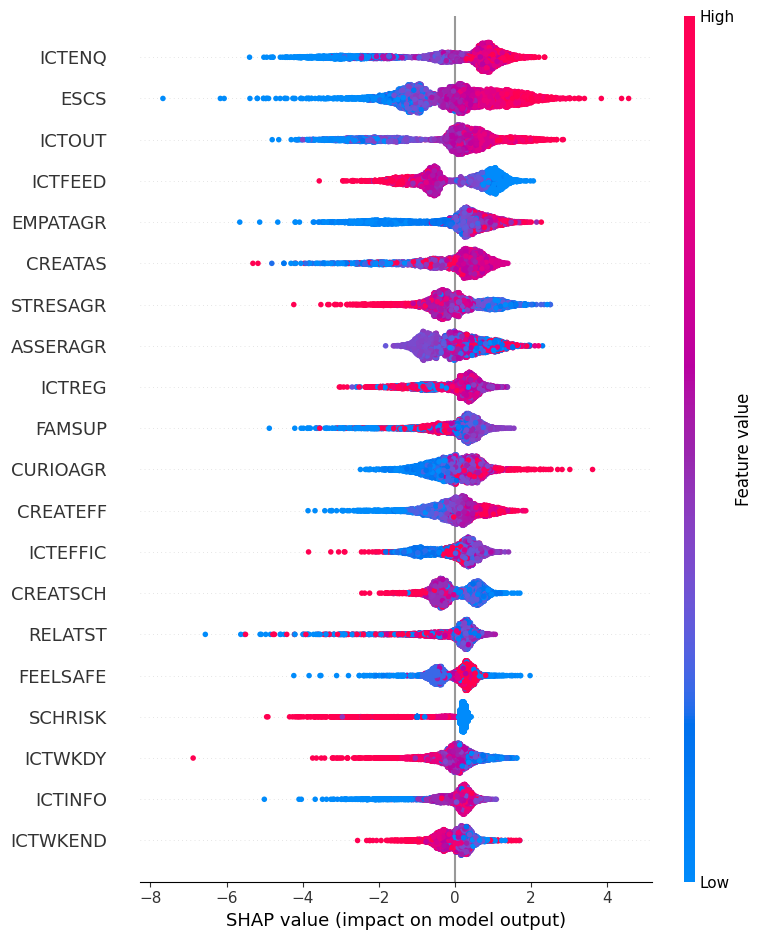

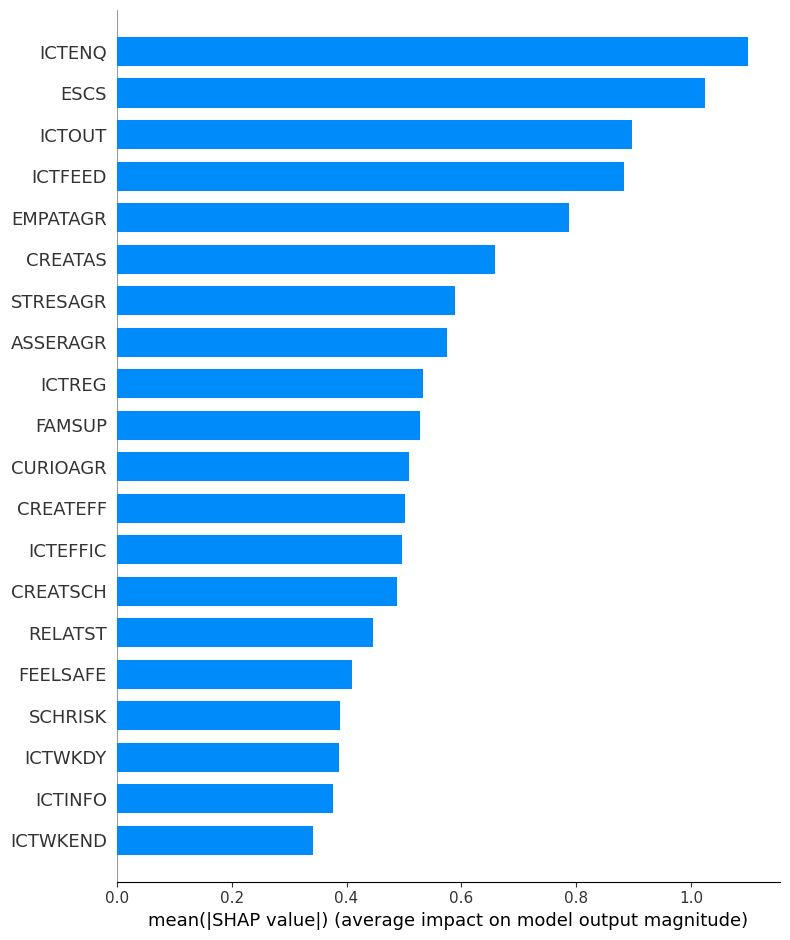

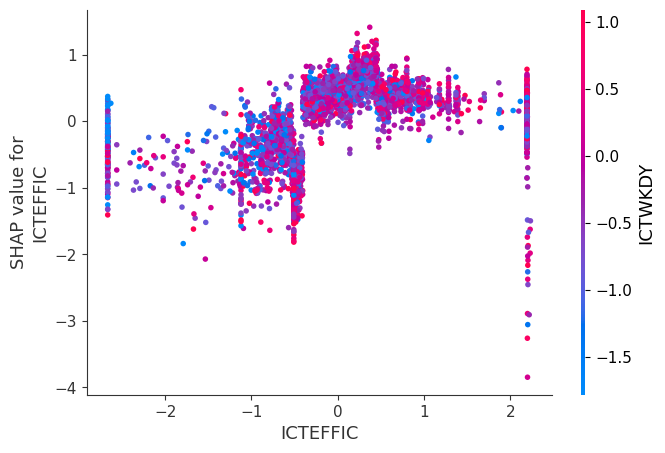

In [8]:
import pyreadstat
import pandas as pd
import os
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer
import numpy as np
import shap
import optuna
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import pickle

# Step 1: 定义文件名和变量列表
'''
abspath = os.path.abspath(__file__)
dname = os.path.dirname(abspath)
os.chdir(dname)
'''
sav_filename = "./Data/Korea.sav"

variables_of_interest = [
    "ESCS", "RELATST", "BELONG", "BULLIED", "FEELSAFE", "SCHRISK", "PERSEVAGR",
    "CURIOAGR", "COOPAGR", "EMPATAGR", "ASSERAGR", "STRESAGR", "EMOCOAGR", "GROSAGR",
    "FAMSUP", "CREATEFF", "CREATSCH", "CREATFAM", "CREATAS", "CREATOOS", "CREATOP",
    "ICTSCH", "ICTHOME", "ICTQUAL", "ICTSUBJ", "ICTENQ", "ICTFEED", "ICTOUT", "ICTWKDY",
    "ICTWKEND", "ICTREG", "ICTINFO", "ICTEFFIC"
]

target_variable = "PV1CRTH_NC"

# Step 2: 读取数据
df, meta = pyreadstat.read_sav(sav_filename)

selected_columns = variables_of_interest + [target_variable]
missing_columns = [col for col in selected_columns if col not in df.columns]

if len(missing_columns) > 0:
    print("Missing columns:", missing_columns)
else:
    df_filtered = df[selected_columns]
    print("Filtered data shape:", df_filtered.shape)
    print(df_filtered.head())
    print(df_filtered.isnull().sum())

    # Step 4: 缺失值处理
    missing_counts = df_filtered.isnull().sum()

    # 计算总数据的 20%
    total_rows = df_filtered.shape[0]
    threshold = total_rows * 0.2  # 20%的阈值

    # 删除缺失值超过总数据 20% 的列
    cols_to_drop = missing_counts[missing_counts > threshold].index.tolist()
    if len(cols_to_drop) > 0:
        print("Dropping columns with more than 20% missing values:", cols_to_drop)
        df_filtered = df_filtered.drop(columns=cols_to_drop)
    else:
        print("No columns dropped.")

    print("Missing after drop:")
    print(df_filtered.isnull().sum())

    # 对剩余的缺失值进行 KNN 插补
    remaining_missing = df_filtered.isnull().sum()
    columns_with_missing = remaining_missing[remaining_missing > 0].index

    # 创建 KNN 插补器，n_neighbors 参数指定使用多少个邻居进行插补
    knn_imputer = KNNImputer(n_neighbors=5)

    # 对缺失值进行插补
    df_filtered[columns_with_missing] = knn_imputer.fit_transform(df_filtered[columns_with_missing])

    print("Missing after KNN imputation:")
    print(df_filtered.isnull().sum())

    # Step 5: 划分数据集
    X = df_filtered.drop(columns=[target_variable])
    y = df_filtered[target_variable]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Training set shape:", X_train.shape)
    print("Test set shape:", X_test.shape)

    # **新增** 使用手动交叉验证和Optuna对XGBoost进行超参数调优
    def objective(trial):
        # 定义贝叶斯优化的超参数空间
        param = {
            'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
            'max_depth': trial.suggest_int('max_depth', 5, 25),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
            'subsample': trial.suggest_float('subsample', 0.5, 0.9),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 0.9),
            'alpha': trial.suggest_float('alpha', 0, 0.1),
            'lambda': trial.suggest_float('lambda', 0, 0.1),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
            'gamma': trial.suggest_float('gamma', 0, 0.5),
            'device': 'cuda',  # 使用CUDA设备
            'eval_metric': 'rmse',  # 初始化时指定评估指标
            'early_stopping_rounds': 50
        }

        model = XGBRegressor(**param)

        # 手动进行交叉验证
        kf = KFold(n_splits=10, shuffle=True, random_state=42)
        r2_scores = []

        for train_idx, val_idx in kf.split(X_train):
            X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

            model.fit(X_train_cv, y_train_cv, eval_set=[(X_val_cv, y_val_cv)], verbose=False)
            y_pred = model.predict(X_val_cv)
            r2_scores.append(r2_score(y_val_cv, y_pred))

        return np.mean(r2_scores)

    # 创建并运行Optuna优化，目标是最大化R²
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100)

    print("Best hyperparameters:", study.best_params)
    print("Best R²:", study.best_value)

    # 获取最佳超参数并训练最佳模型
    best_params = study.best_params
    best_model = XGBRegressor(**best_params)
    best_model.fit(X_train, y_train)

    # 使用最佳模型在测试集评估
    y_pred = best_model.predict(X_test)

    # 计算测试集上的MSE和R²
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("MSE on test set with tuned model:", mse)
    print("R² on test set with tuned model:", r2)

    # 保存最佳模型
    with open('Korea.pkl', 'wb') as f:
      pickle.dump(best_model, f)

    # Step 6: SHAP分析
    '''
    feature_name_map = {
        "ESCS": "Index of economic, social and cultural status",
        "RELATST": "Quality of student-teacher relationships",
        "BELONG": "Sense of belonging",
        "BULLIED": "Being bullied",
        "FEELSAFE": "Feeling safe",
        "SCHRISK": "School safety risks",
        "PERSEVAGR": "Perseverance (agreement) (WLE)",
        "CURIOAGR": "Curiosity (agreement) (WLE)",
        "COOPAGR": "Cooperation (agreement) (WLE)",
        "EMPATAGR": "Empathy (agreement) (WLE)",
        "ASSERAGR": "Assertiveness (agreement) (WLE)",
        "STRESAGR": "Stress resistance (agreement) (WLE)",
        "EMOCOAGR": "Emotional control (agreement) (WLE)",
        "GROSAGR": "Growth Mindset (WLE)",
        "FAMSUP": "Family support (WLE)",
        "CREATEFF": "Creative self-efficacy (WLE)",
        "CREATSCH": "Creative school and class environment (WLE)",
        "CREATFAM": "Creative peers and family environment (WLE)",
        "CREATAS": "Creative Activities at school (WLE)",
        "CREATOOS": "Creative Activities outside of school (WLE)",
        "CREATOP": "Creativity and Openness to Intellect TBD (WLE)",
        "ICTSCH": "ICT availability at school (WLE)",
        "ICTHOME": "ICT availability outside of school (WLE)",
        "ICTQUAL": "Quality of access to ICT (WLE)",
        "ICTSUBJ": "Subject-related ICT Use During Lessons (WLE)",
        "ICTENQ": "Use of ICT in enquiry-based learning activities (WLE)",
        "ICTFEED": "Support or feedback via ICT (WLE)",
        "ICTOUT": "Use of ICT for school activities outside of the classroom (WLE)",
        "ICTWKDY": "Frequency of ICT activity (weekday) (WLE)",
        "ICTWKEND": "Frequency of ICT activity (weekend) (WLE)",
        "ICTREG": "Views of regulated ICT use in school (WLE)",
        "ICTINFO": "Students’ practices regarding online information (WLE)",
        "ICTEFFIC": "Self-efficacy in digital competencies (WLE)"
    }
    '''

    # 将数据集列名映射为详细描述
    # X_train_renamed = X_train.rename(columns=feature_name_map)

    # 基于训练好的最优模型进行SHAP值分析
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_train)

    # 全局特征重要度可视化 (summary_plot)
    shap.summary_plot(shap_values, X_train, plot_type="dot")

    # 展示特征重要性 (bar plot)
    shap.summary_plot(shap_values, X_train, plot_type="bar")

    # 查看单个特征的依赖关系图
    shap.dependence_plot("ICTEFFIC", shap_values, X_train)

Filtered data shape: (3325, 34)
     ESCS  RELATST  BELONG  BULLIED  FEELSAFE  SCHRISK  PERSEVAGR  CURIOAGR  \
0  0.4168   1.2586  2.4581  -1.2280    1.1246  -0.6386    -0.4897    0.8647   
1  0.1447  -0.5016  0.7979  -1.2280    1.1246  -0.6386    -0.9491   -0.4847   
2  0.1002   2.0022  2.2967  -1.2280   -0.7560  -0.6386    -0.6158   -0.8395   
3  0.8835   1.7633  1.3972  -0.1325    0.1368  -0.6386     0.5427    0.6063   
4  0.8354   1.9598  2.4581  -1.2280    1.1246  -0.6386    -0.8694    2.3815   

   COOPAGR  EMPATAGR  ...  ICTSUBJ  ICTENQ  ICTFEED  ICTOUT  ICTWKDY  \
0   0.0823   -0.1419  ...  -0.8257 -2.3763  -1.6286 -2.6018   0.4639   
1  -0.6302   -0.9558  ...   0.8592  0.2713   0.3074 -0.1205  -0.1672   
2   1.4878   -1.2384  ...   0.3155 -2.3763  -1.6286 -2.6018  -3.6513   
3  -0.3165    1.0560  ...   0.0754 -0.3269  -0.2467 -0.8136  -1.5527   
4  -0.4226    0.2172  ...  -0.5968 -0.5535  -1.6286 -0.9779  -1.4848   

   ICTWKEND  ICTREG  ICTINFO  ICTEFFIC  PV1CRTH_NC  
0    0.

<ipython-input-9-3ef646efd301>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[columns_with_missing] = knn_imputer.fit_transform(df_filtered[columns_with_missing])
[I 2024-12-19 11:45:14,569] A new study created in memory with name: no-name-b22d2baf-789f-40ac-9e20-14c01ccf0ff9


Missing after KNN imputation:
ESCS          0
RELATST       0
BELONG        0
BULLIED       0
FEELSAFE      0
SCHRISK       0
PERSEVAGR     0
CURIOAGR      0
COOPAGR       0
EMPATAGR      0
ASSERAGR      0
STRESAGR      0
EMOCOAGR      0
GROSAGR       0
FAMSUP        0
CREATEFF      0
CREATSCH      0
CREATFAM      0
CREATAS       0
CREATOOS      0
CREATOP       0
ICTSCH        0
ICTHOME       0
ICTQUAL       0
ICTSUBJ       0
ICTENQ        0
ICTFEED       0
ICTOUT        0
ICTWKDY       0
ICTWKEND      0
ICTREG        0
ICTINFO       0
ICTEFFIC      0
PV1CRTH_NC    0
dtype: int64
Training set shape: (2660, 33)
Test set shape: (665, 33)


[I 2024-12-19 11:45:22,380] Trial 0 finished with value: 0.16855566193380667 and parameters: {'n_estimators': 1896, 'max_depth': 16, 'learning_rate': 0.1453557446570044, 'subsample': 0.8656350097782066, 'colsample_bytree': 0.7140337554113255, 'alpha': 0.02577608703579526, 'lambda': 0.05098640830644174, 'min_child_weight': 1, 'gamma': 0.4465960109462018}. Best is trial 0 with value: 0.16855566193380667.
[I 2024-12-19 11:45:25,157] Trial 1 finished with value: 0.04992871575870974 and parameters: {'n_estimators': 705, 'max_depth': 11, 'learning_rate': 0.4348099751066306, 'subsample': 0.7439886450169876, 'colsample_bytree': 0.6912234942401098, 'alpha': 0.0714327121553201, 'lambda': 0.07738981871666467, 'min_child_weight': 3, 'gamma': 0.21960028095760603}. Best is trial 0 with value: 0.16855566193380667.
[I 2024-12-19 11:45:33,508] Trial 2 finished with value: 0.18289177015618824 and parameters: {'n_estimators': 1735, 'max_depth': 14, 'learning_rate': 0.10275300568658291, 'subsample': 0.577

Best hyperparameters: {'n_estimators': 1052, 'max_depth': 5, 'learning_rate': 0.014031022318093722, 'subsample': 0.8915277836215865, 'colsample_bytree': 0.5086607434176662, 'alpha': 0.0005405490177640877, 'lambda': 0.09237324084468658, 'min_child_weight': 5, 'gamma': 0.11762097921188969}
Best R²: 0.2705831797039389
MSE on test set with tuned model: 77.56322266825714
R² on test set with tuned model: 0.30250256512252727


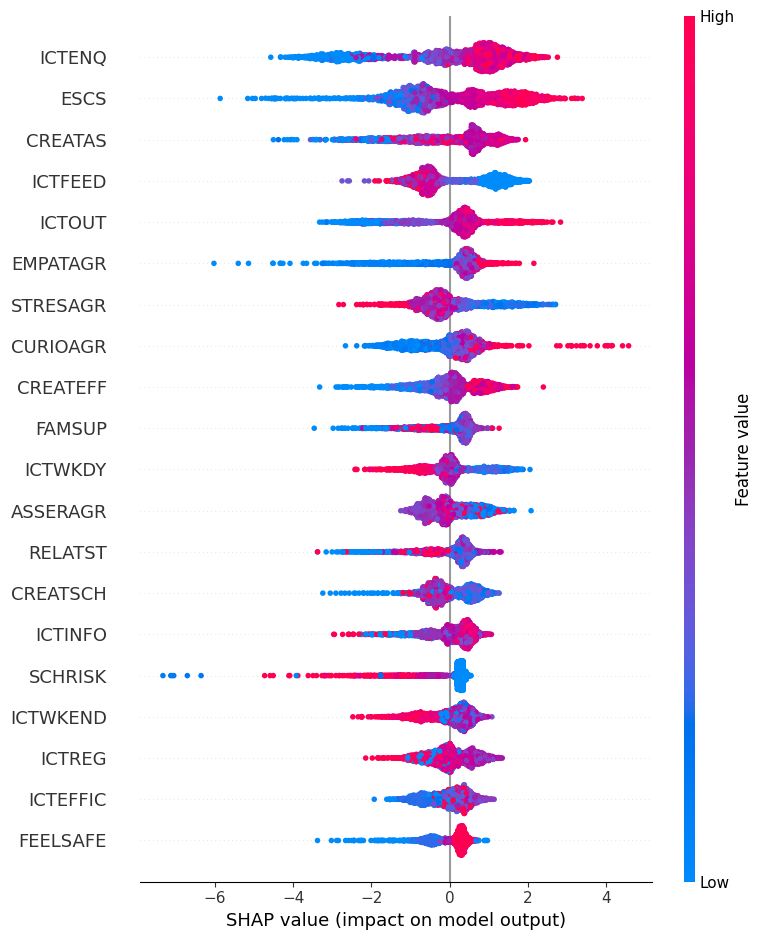

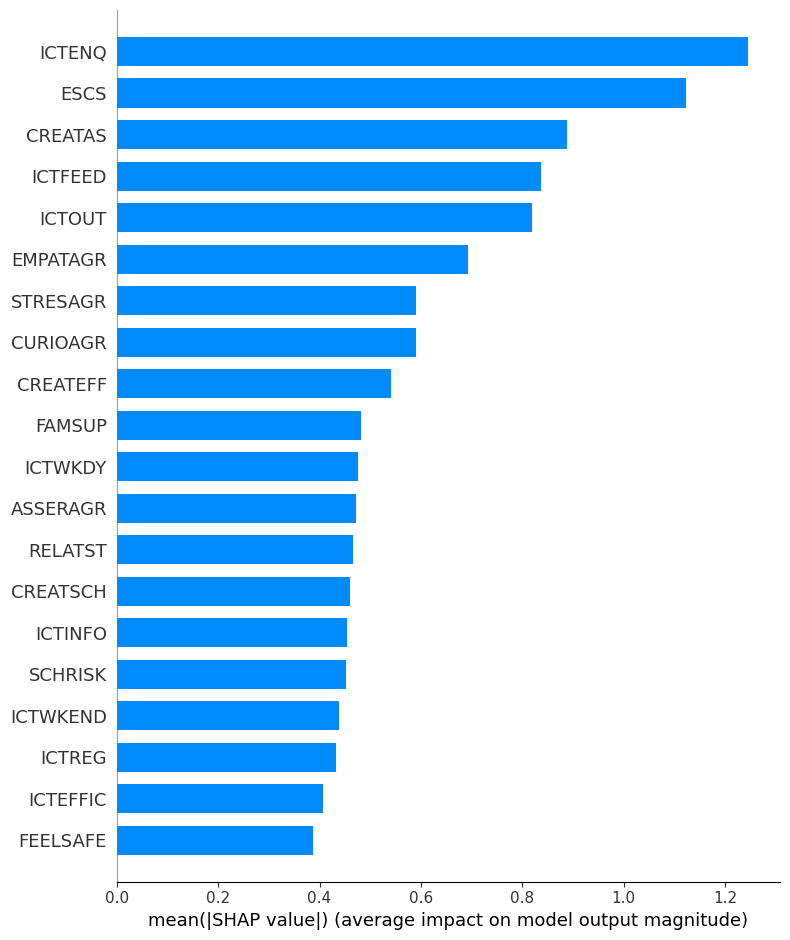

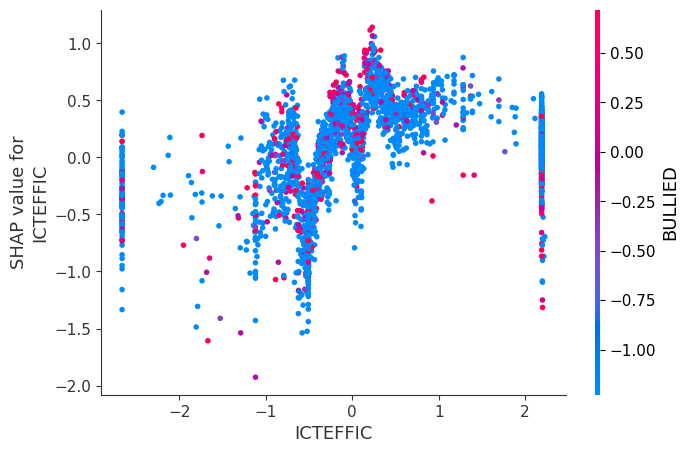

In [9]:
import pyreadstat
import pandas as pd
import os
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer
import numpy as np
import shap
import optuna
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import pickle

# Step 1: 定义文件名和变量列表
'''
abspath = os.path.abspath(__file__)
dname = os.path.dirname(abspath)
os.chdir(dname)
'''
sav_filename = "./Data/Korea_Male.sav"

variables_of_interest = [
    "ESCS", "RELATST", "BELONG", "BULLIED", "FEELSAFE", "SCHRISK", "PERSEVAGR",
    "CURIOAGR", "COOPAGR", "EMPATAGR", "ASSERAGR", "STRESAGR", "EMOCOAGR", "GROSAGR",
    "FAMSUP", "CREATEFF", "CREATSCH", "CREATFAM", "CREATAS", "CREATOOS", "CREATOP",
    "ICTSCH", "ICTHOME", "ICTQUAL", "ICTSUBJ", "ICTENQ", "ICTFEED", "ICTOUT", "ICTWKDY",
    "ICTWKEND", "ICTREG", "ICTINFO", "ICTEFFIC"
]

target_variable = "PV1CRTH_NC"

# Step 2: 读取数据
df, meta = pyreadstat.read_sav(sav_filename)

selected_columns = variables_of_interest + [target_variable]
missing_columns = [col for col in selected_columns if col not in df.columns]

if len(missing_columns) > 0:
    print("Missing columns:", missing_columns)
else:
    df_filtered = df[selected_columns]
    print("Filtered data shape:", df_filtered.shape)
    print(df_filtered.head())
    print(df_filtered.isnull().sum())

    # Step 4: 缺失值处理
    missing_counts = df_filtered.isnull().sum()

    # 计算总数据的 20%
    total_rows = df_filtered.shape[0]
    threshold = total_rows * 0.2  # 20%的阈值

    # 删除缺失值超过总数据 20% 的列
    cols_to_drop = missing_counts[missing_counts > threshold].index.tolist()
    if len(cols_to_drop) > 0:
        print("Dropping columns with more than 20% missing values:", cols_to_drop)
        df_filtered = df_filtered.drop(columns=cols_to_drop)
    else:
        print("No columns dropped.")

    print("Missing after drop:")
    print(df_filtered.isnull().sum())

    # 对剩余的缺失值进行 KNN 插补
    remaining_missing = df_filtered.isnull().sum()
    columns_with_missing = remaining_missing[remaining_missing > 0].index

    # 创建 KNN 插补器，n_neighbors 参数指定使用多少个邻居进行插补
    knn_imputer = KNNImputer(n_neighbors=5)

    # 对缺失值进行插补
    df_filtered[columns_with_missing] = knn_imputer.fit_transform(df_filtered[columns_with_missing])

    print("Missing after KNN imputation:")
    print(df_filtered.isnull().sum())

    # Step 5: 划分数据集
    X = df_filtered.drop(columns=[target_variable])
    y = df_filtered[target_variable]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Training set shape:", X_train.shape)
    print("Test set shape:", X_test.shape)

    # **新增** 使用手动交叉验证和Optuna对XGBoost进行超参数调优
    def objective(trial):
        # 定义贝叶斯优化的超参数空间
        param = {
            'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
            'max_depth': trial.suggest_int('max_depth', 5, 25),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
            'subsample': trial.suggest_float('subsample', 0.5, 0.9),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 0.9),
            'alpha': trial.suggest_float('alpha', 0, 0.1),
            'lambda': trial.suggest_float('lambda', 0, 0.1),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
            'gamma': trial.suggest_float('gamma', 0, 0.5),
            'device': 'cuda',  # 使用CUDA设备
            'eval_metric': 'rmse',  # 初始化时指定评估指标
            'early_stopping_rounds': 50
        }

        model = XGBRegressor(**param)

        # 手动进行交叉验证
        kf = KFold(n_splits=10, shuffle=True, random_state=42)
        r2_scores = []

        for train_idx, val_idx in kf.split(X_train):
            X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

            model.fit(X_train_cv, y_train_cv, eval_set=[(X_val_cv, y_val_cv)], verbose=False)
            y_pred = model.predict(X_val_cv)
            r2_scores.append(r2_score(y_val_cv, y_pred))

        return np.mean(r2_scores)

    # 创建并运行Optuna优化，目标是最大化R²
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100)

    print("Best hyperparameters:", study.best_params)
    print("Best R²:", study.best_value)

    # 获取最佳超参数并训练最佳模型
    best_params = study.best_params
    best_model = XGBRegressor(**best_params)
    best_model.fit(X_train, y_train)

    # 使用最佳模型在测试集评估
    y_pred = best_model.predict(X_test)

    # 计算测试集上的MSE和R²
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("MSE on test set with tuned model:", mse)
    print("R² on test set with tuned model:", r2)

    # 保存最佳模型
    with open('Korea_Male.pkl', 'wb') as f:
      pickle.dump(best_model, f)

    # Step 6: SHAP分析
    '''
    feature_name_map = {
        "ESCS": "Index of economic, social and cultural status",
        "RELATST": "Quality of student-teacher relationships",
        "BELONG": "Sense of belonging",
        "BULLIED": "Being bullied",
        "FEELSAFE": "Feeling safe",
        "SCHRISK": "School safety risks",
        "PERSEVAGR": "Perseverance (agreement) (WLE)",
        "CURIOAGR": "Curiosity (agreement) (WLE)",
        "COOPAGR": "Cooperation (agreement) (WLE)",
        "EMPATAGR": "Empathy (agreement) (WLE)",
        "ASSERAGR": "Assertiveness (agreement) (WLE)",
        "STRESAGR": "Stress resistance (agreement) (WLE)",
        "EMOCOAGR": "Emotional control (agreement) (WLE)",
        "GROSAGR": "Growth Mindset (WLE)",
        "FAMSUP": "Family support (WLE)",
        "CREATEFF": "Creative self-efficacy (WLE)",
        "CREATSCH": "Creative school and class environment (WLE)",
        "CREATFAM": "Creative peers and family environment (WLE)",
        "CREATAS": "Creative Activities at school (WLE)",
        "CREATOOS": "Creative Activities outside of school (WLE)",
        "CREATOP": "Creativity and Openness to Intellect TBD (WLE)",
        "ICTSCH": "ICT availability at school (WLE)",
        "ICTHOME": "ICT availability outside of school (WLE)",
        "ICTQUAL": "Quality of access to ICT (WLE)",
        "ICTSUBJ": "Subject-related ICT Use During Lessons (WLE)",
        "ICTENQ": "Use of ICT in enquiry-based learning activities (WLE)",
        "ICTFEED": "Support or feedback via ICT (WLE)",
        "ICTOUT": "Use of ICT for school activities outside of the classroom (WLE)",
        "ICTWKDY": "Frequency of ICT activity (weekday) (WLE)",
        "ICTWKEND": "Frequency of ICT activity (weekend) (WLE)",
        "ICTREG": "Views of regulated ICT use in school (WLE)",
        "ICTINFO": "Students’ practices regarding online information (WLE)",
        "ICTEFFIC": "Self-efficacy in digital competencies (WLE)"
    }
    '''

    # 将数据集列名映射为详细描述
    # X_train_renamed = X_train.rename(columns=feature_name_map)

    # 基于训练好的最优模型进行SHAP值分析
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_train)

    # 全局特征重要度可视化 (summary_plot)
    shap.summary_plot(shap_values, X_train, plot_type="dot")

    # 展示特征重要性 (bar plot)
    shap.summary_plot(shap_values, X_train, plot_type="bar")

    # 查看单个特征的依赖关系图
    shap.dependence_plot("ICTEFFIC", shap_values, X_train)

Filtered data shape: (3129, 34)
     ESCS  RELATST  BELONG  BULLIED  FEELSAFE  SCHRISK  PERSEVAGR  CURIOAGR  \
0  1.2884  -0.7982  0.7289  -1.2280    1.1246  -0.6386    -0.1105   -0.5983   
1  0.4107   1.0128 -0.5636  -1.2280   -0.0918   0.1810     0.0456   -1.1632   
2  0.2030  -0.4010 -0.1988  -1.2280    1.1246  -0.6386    -0.2694   -0.6783   
3 -0.4307  -0.7958 -0.3485  -0.1325   -0.7560  -0.6386    -0.8069    0.0565   
4  1.4755  -0.6778 -0.6412  -1.2280   -0.7560  -0.6386    -0.2208   -0.8522   

   COOPAGR  EMPATAGR  ...  ICTSUBJ  ICTENQ  ICTFEED  ICTOUT  ICTWKDY  \
0   0.5526   -0.4662  ...  -1.1559  0.3109  -0.5112  2.9804  -0.2585   
1   2.1694    0.1874  ...  -0.1588 -0.3584   0.3074  0.1180   0.4639   
2  -0.6274   -0.1899  ...   1.9500 -0.7786  -1.6286 -2.6018  -0.1845   
3  -0.9088   -0.4784  ...  -0.3500 -0.0822  -0.2822  0.9468  -0.3542   
4  -0.9425   -0.8348  ...   0.8077  1.0825   1.0460  0.2655   0.4522   

   ICTWKEND  ICTREG  ICTINFO  ICTEFFIC  PV1CRTH_NC  
0   -0.

<ipython-input-10-c7930027c4a7>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[columns_with_missing] = knn_imputer.fit_transform(df_filtered[columns_with_missing])
[I 2024-12-19 12:14:59,037] A new study created in memory with name: no-name-7fd300f9-9898-4b05-b3ae-3f0865aa5def


Missing after KNN imputation:
ESCS          0
RELATST       0
BELONG        0
BULLIED       0
FEELSAFE      0
SCHRISK       0
PERSEVAGR     0
CURIOAGR      0
COOPAGR       0
EMPATAGR      0
ASSERAGR      0
STRESAGR      0
EMOCOAGR      0
GROSAGR       0
FAMSUP        0
CREATEFF      0
CREATSCH      0
CREATFAM      0
CREATAS       0
CREATOOS      0
CREATOP       0
ICTSCH        0
ICTHOME       0
ICTQUAL       0
ICTSUBJ       0
ICTENQ        0
ICTFEED       0
ICTOUT        0
ICTWKDY       0
ICTWKEND      0
ICTREG        0
ICTINFO       0
ICTEFFIC      0
PV1CRTH_NC    0
dtype: int64
Training set shape: (2503, 33)
Test set shape: (626, 33)


[I 2024-12-19 12:15:02,637] Trial 0 finished with value: -0.13988329486696688 and parameters: {'n_estimators': 1059, 'max_depth': 21, 'learning_rate': 0.6717111383130124, 'subsample': 0.7262043320635271, 'colsample_bytree': 0.7454331246433502, 'alpha': 0.052237561386394474, 'lambda': 0.09963050110868096, 'min_child_weight': 4, 'gamma': 0.14711428426292128}. Best is trial 0 with value: -0.13988329486696688.
[I 2024-12-19 12:15:05,514] Trial 1 finished with value: -0.22547803527730031 and parameters: {'n_estimators': 804, 'max_depth': 21, 'learning_rate': 0.6672774185795417, 'subsample': 0.7974179516151552, 'colsample_bytree': 0.7976473407395086, 'alpha': 0.06492001612602376, 'lambda': 0.048832176486083845, 'min_child_weight': 2, 'gamma': 0.07595134243294893}. Best is trial 0 with value: -0.13988329486696688.
[I 2024-12-19 12:15:09,133] Trial 2 finished with value: 0.015837762912919506 and parameters: {'n_estimators': 1067, 'max_depth': 21, 'learning_rate': 0.3932553192067187, 'subsample

Best hyperparameters: {'n_estimators': 1214, 'max_depth': 6, 'learning_rate': 0.04239083506857488, 'subsample': 0.5816462470165521, 'colsample_bytree': 0.8751162420268042, 'alpha': 0.05498086238103901, 'lambda': 0.0046640704648532195, 'min_child_weight': 3, 'gamma': 0.4843784945213947}
Best R²: 0.20566312593041522
MSE on test set with tuned model: 68.08703371291155
R² on test set with tuned model: 0.2617065008319479


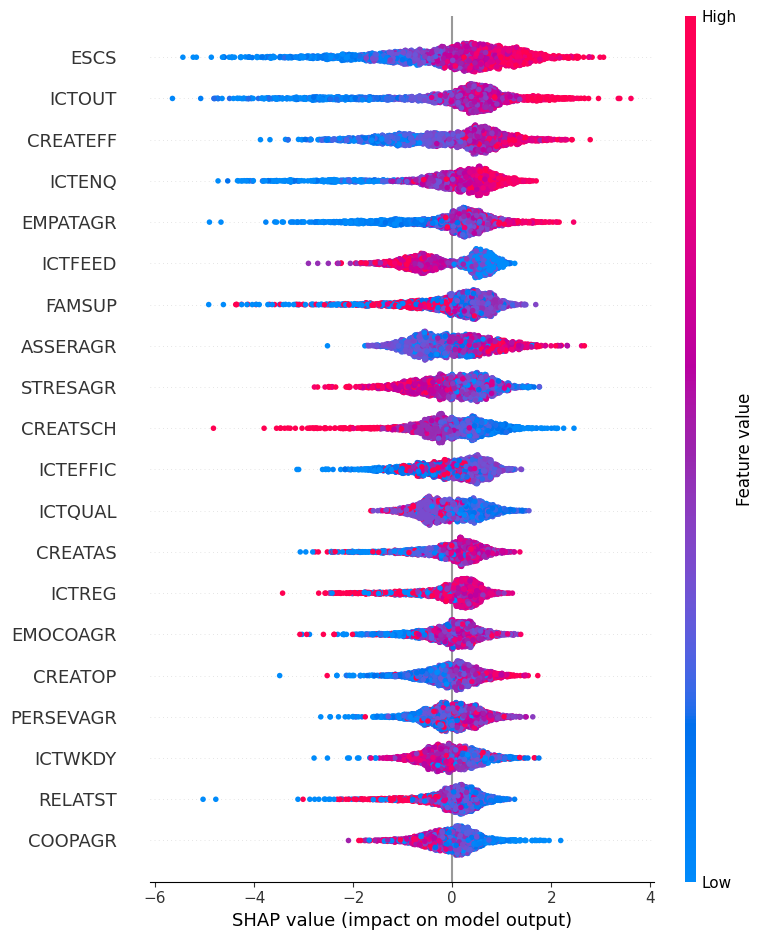

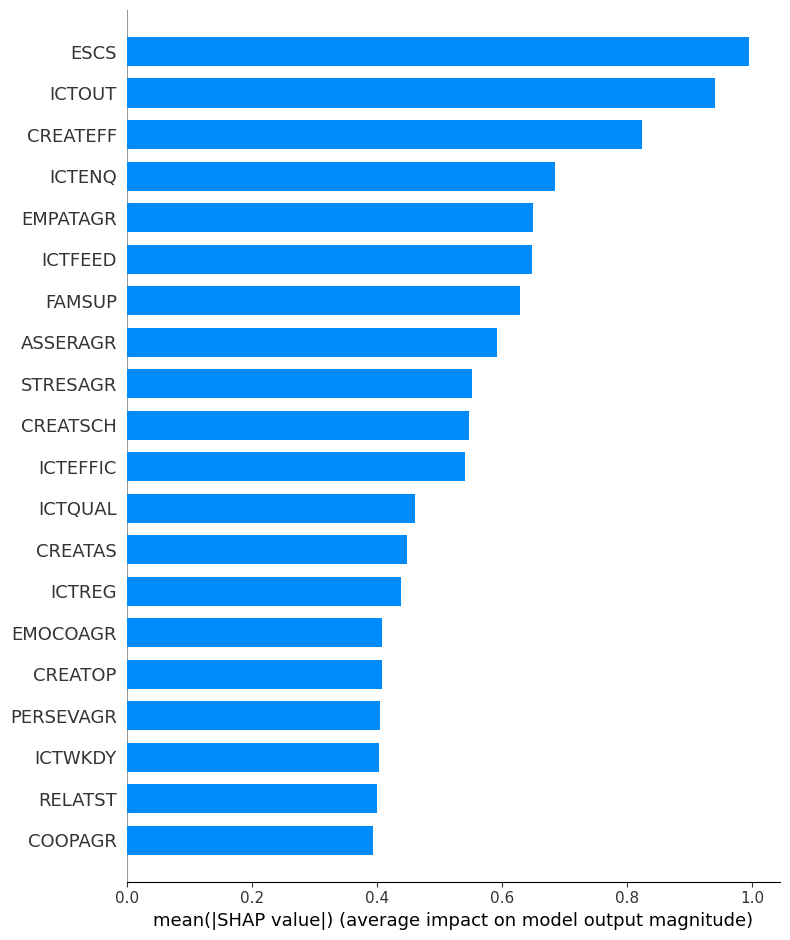

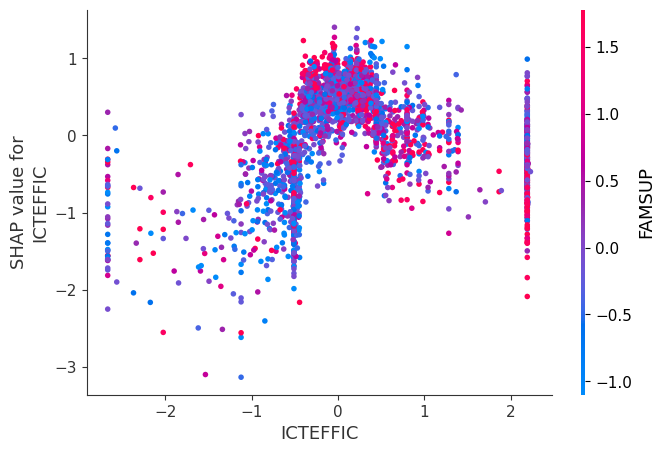

In [10]:
import pyreadstat
import pandas as pd
import os
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer
import numpy as np
import shap
import optuna
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import pickle

# Step 1: 定义文件名和变量列表
'''
abspath = os.path.abspath(__file__)
dname = os.path.dirname(abspath)
os.chdir(dname)
'''
sav_filename = "./Data/Korea_Female.sav"

variables_of_interest = [
    "ESCS", "RELATST", "BELONG", "BULLIED", "FEELSAFE", "SCHRISK", "PERSEVAGR",
    "CURIOAGR", "COOPAGR", "EMPATAGR", "ASSERAGR", "STRESAGR", "EMOCOAGR", "GROSAGR",
    "FAMSUP", "CREATEFF", "CREATSCH", "CREATFAM", "CREATAS", "CREATOOS", "CREATOP",
    "ICTSCH", "ICTHOME", "ICTQUAL", "ICTSUBJ", "ICTENQ", "ICTFEED", "ICTOUT", "ICTWKDY",
    "ICTWKEND", "ICTREG", "ICTINFO", "ICTEFFIC"
]

target_variable = "PV1CRTH_NC"

# Step 2: 读取数据
df, meta = pyreadstat.read_sav(sav_filename)

selected_columns = variables_of_interest + [target_variable]
missing_columns = [col for col in selected_columns if col not in df.columns]

if len(missing_columns) > 0:
    print("Missing columns:", missing_columns)
else:
    df_filtered = df[selected_columns]
    print("Filtered data shape:", df_filtered.shape)
    print(df_filtered.head())
    print(df_filtered.isnull().sum())

    # Step 4: 缺失值处理
    missing_counts = df_filtered.isnull().sum()

    # 计算总数据的 20%
    total_rows = df_filtered.shape[0]
    threshold = total_rows * 0.2  # 20%的阈值

    # 删除缺失值超过总数据 20% 的列
    cols_to_drop = missing_counts[missing_counts > threshold].index.tolist()
    if len(cols_to_drop) > 0:
        print("Dropping columns with more than 20% missing values:", cols_to_drop)
        df_filtered = df_filtered.drop(columns=cols_to_drop)
    else:
        print("No columns dropped.")

    print("Missing after drop:")
    print(df_filtered.isnull().sum())

    # 对剩余的缺失值进行 KNN 插补
    remaining_missing = df_filtered.isnull().sum()
    columns_with_missing = remaining_missing[remaining_missing > 0].index

    # 创建 KNN 插补器，n_neighbors 参数指定使用多少个邻居进行插补
    knn_imputer = KNNImputer(n_neighbors=5)

    # 对缺失值进行插补
    df_filtered[columns_with_missing] = knn_imputer.fit_transform(df_filtered[columns_with_missing])

    print("Missing after KNN imputation:")
    print(df_filtered.isnull().sum())

    # Step 5: 划分数据集
    X = df_filtered.drop(columns=[target_variable])
    y = df_filtered[target_variable]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Training set shape:", X_train.shape)
    print("Test set shape:", X_test.shape)

    # **新增** 使用手动交叉验证和Optuna对XGBoost进行超参数调优
    def objective(trial):
        # 定义贝叶斯优化的超参数空间
        param = {
            'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
            'max_depth': trial.suggest_int('max_depth', 5, 25),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
            'subsample': trial.suggest_float('subsample', 0.5, 0.9),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 0.9),
            'alpha': trial.suggest_float('alpha', 0, 0.1),
            'lambda': trial.suggest_float('lambda', 0, 0.1),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
            'gamma': trial.suggest_float('gamma', 0, 0.5),
            'device': 'cuda',  # 使用CUDA设备
            'eval_metric': 'rmse',  # 初始化时指定评估指标
            'early_stopping_rounds': 50
        }

        model = XGBRegressor(**param)

        # 手动进行交叉验证
        kf = KFold(n_splits=10, shuffle=True, random_state=42)
        r2_scores = []

        for train_idx, val_idx in kf.split(X_train):
            X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

            model.fit(X_train_cv, y_train_cv, eval_set=[(X_val_cv, y_val_cv)], verbose=False)
            y_pred = model.predict(X_val_cv)
            r2_scores.append(r2_score(y_val_cv, y_pred))

        return np.mean(r2_scores)

    # 创建并运行Optuna优化，目标是最大化R²
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100)

    print("Best hyperparameters:", study.best_params)
    print("Best R²:", study.best_value)

    # 获取最佳超参数并训练最佳模型
    best_params = study.best_params
    best_model = XGBRegressor(**best_params)
    best_model.fit(X_train, y_train)

    # 使用最佳模型在测试集评估
    y_pred = best_model.predict(X_test)

    # 计算测试集上的MSE和R²
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("MSE on test set with tuned model:", mse)
    print("R² on test set with tuned model:", r2)

    # 保存最佳模型
    with open('Korea_Female.pkl', 'wb') as f:
      pickle.dump(best_model, f)

    # Step 6: SHAP分析
    '''
    feature_name_map = {
        "ESCS": "Index of economic, social and cultural status",
        "RELATST": "Quality of student-teacher relationships",
        "BELONG": "Sense of belonging",
        "BULLIED": "Being bullied",
        "FEELSAFE": "Feeling safe",
        "SCHRISK": "School safety risks",
        "PERSEVAGR": "Perseverance (agreement) (WLE)",
        "CURIOAGR": "Curiosity (agreement) (WLE)",
        "COOPAGR": "Cooperation (agreement) (WLE)",
        "EMPATAGR": "Empathy (agreement) (WLE)",
        "ASSERAGR": "Assertiveness (agreement) (WLE)",
        "STRESAGR": "Stress resistance (agreement) (WLE)",
        "EMOCOAGR": "Emotional control (agreement) (WLE)",
        "GROSAGR": "Growth Mindset (WLE)",
        "FAMSUP": "Family support (WLE)",
        "CREATEFF": "Creative self-efficacy (WLE)",
        "CREATSCH": "Creative school and class environment (WLE)",
        "CREATFAM": "Creative peers and family environment (WLE)",
        "CREATAS": "Creative Activities at school (WLE)",
        "CREATOOS": "Creative Activities outside of school (WLE)",
        "CREATOP": "Creativity and Openness to Intellect TBD (WLE)",
        "ICTSCH": "ICT availability at school (WLE)",
        "ICTHOME": "ICT availability outside of school (WLE)",
        "ICTQUAL": "Quality of access to ICT (WLE)",
        "ICTSUBJ": "Subject-related ICT Use During Lessons (WLE)",
        "ICTENQ": "Use of ICT in enquiry-based learning activities (WLE)",
        "ICTFEED": "Support or feedback via ICT (WLE)",
        "ICTOUT": "Use of ICT for school activities outside of the classroom (WLE)",
        "ICTWKDY": "Frequency of ICT activity (weekday) (WLE)",
        "ICTWKEND": "Frequency of ICT activity (weekend) (WLE)",
        "ICTREG": "Views of regulated ICT use in school (WLE)",
        "ICTINFO": "Students’ practices regarding online information (WLE)",
        "ICTEFFIC": "Self-efficacy in digital competencies (WLE)"
    }
    '''

    # 将数据集列名映射为详细描述
    # X_train_renamed = X_train.rename(columns=feature_name_map)

    # 基于训练好的最优模型进行SHAP值分析
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_train)

    # 全局特征重要度可视化 (summary_plot)
    shap.summary_plot(shap_values, X_train, plot_type="dot")

    # 展示特征重要性 (bar plot)
    shap.summary_plot(shap_values, X_train, plot_type="bar")

    # 查看单个特征的依赖关系图
    shap.dependence_plot("ICTEFFIC", shap_values, X_train)

Filtered data shape: (5244, 34)
     ESCS  RELATST  BELONG  BULLIED  FEELSAFE  SCHRISK  PERSEVAGR  CURIOAGR  \
0  1.1134  -0.6217  0.1832   1.3081    0.4938   1.6186     0.4433    1.5795   
1  0.3183   0.8815  0.5453  -1.2280   -0.7560   1.1800     0.2848    0.0869   
2  0.5459   0.1255  1.1314  -1.2280    1.1246   0.1810    -0.2359   -0.5251   
3  0.0085  -0.6560  0.1436   0.5767    0.6942  -0.6386    -0.8057   -0.9159   
4  1.3268  -0.4775  0.5159  -0.1325    1.1246   2.3555    -0.5632   -0.0347   

   COOPAGR  EMPATAGR  ...  ICTSUBJ  ICTENQ  ICTFEED  ICTOUT  ICTWKDY  \
0      NaN   -0.0536  ...   0.2133  0.6405   0.4521  0.0433   0.4639   
1  -0.4394   -0.8087  ...   0.3804  0.3541  -0.7918  0.9041   0.8854   
2  -0.7816   -0.3239  ...  -0.2402  0.2644  -1.6286  0.5052  -1.0655   
3  -0.0929   -0.1387  ...   0.2491 -0.6667  -0.3512 -0.4573  -0.4654   
4  -1.1194    0.3095  ...   0.9928  1.1128   0.8435  0.6400   0.9370   

   ICTWKEND  ICTREG  ICTINFO  ICTEFFIC  PV1CRTH_NC  
0    0.

[I 2024-12-19 13:14:09,943] A new study created in memory with name: no-name-4765ac8c-9f82-44b1-87c8-2d67aa4f66ea


Missing after KNN imputation:
ESCS          0
RELATST       0
BELONG        0
BULLIED       0
FEELSAFE      0
SCHRISK       0
PERSEVAGR     0
CURIOAGR      0
COOPAGR       0
EMPATAGR      0
ASSERAGR      0
STRESAGR      0
EMOCOAGR      0
GROSAGR       0
ICTSCH        0
ICTHOME       0
ICTQUAL       0
ICTSUBJ       0
PV1CRTH_NC    0
dtype: int64
Training set shape: (4195, 18)
Test set shape: (1049, 18)


[I 2024-12-19 13:14:18,146] Trial 0 finished with value: 0.13232887189215953 and parameters: {'n_estimators': 1102, 'max_depth': 25, 'learning_rate': 0.18397706125823945, 'subsample': 0.7104322343592682, 'colsample_bytree': 0.7313368718409281, 'alpha': 0.0011382713830207837, 'lambda': 0.058523284023136724, 'min_child_weight': 2, 'gamma': 0.3530773605093721}. Best is trial 0 with value: 0.13232887189215953.
[I 2024-12-19 13:14:24,238] Trial 1 finished with value: 0.14486959867889654 and parameters: {'n_estimators': 1559, 'max_depth': 21, 'learning_rate': 0.19972281897024596, 'subsample': 0.7594180285256089, 'colsample_bytree': 0.8068010824463503, 'alpha': 0.09371766507872703, 'lambda': 0.057291904014147146, 'min_child_weight': 5, 'gamma': 0.3361271067903743}. Best is trial 1 with value: 0.14486959867889654.
[I 2024-12-19 13:14:28,092] Trial 2 finished with value: 0.021121547282005458 and parameters: {'n_estimators': 1557, 'max_depth': 14, 'learning_rate': 0.5633349419764566, 'subsample'

Best hyperparameters: {'n_estimators': 1449, 'max_depth': 5, 'learning_rate': 0.011128697362860837, 'subsample': 0.6328065780548675, 'colsample_bytree': 0.6532330620345446, 'alpha': 0.042661254383228105, 'lambda': 0.04146833319113498, 'min_child_weight': 4, 'gamma': 0.24272569168366356}
Best R²: 0.26649687494605817
MSE on test set with tuned model: 103.70037617643072
R² on test set with tuned model: 0.3232996510247207


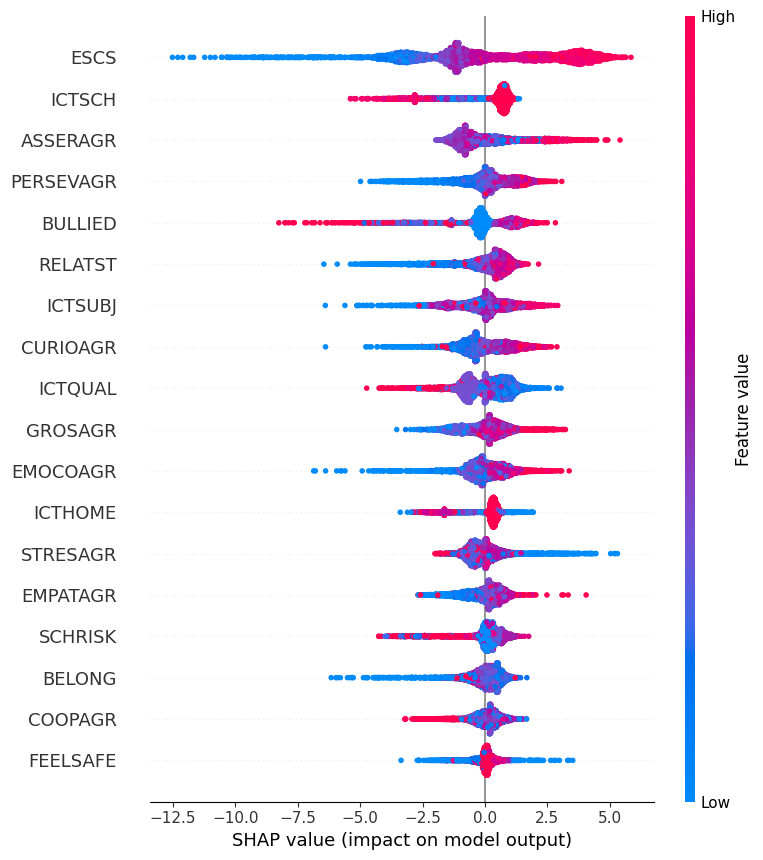

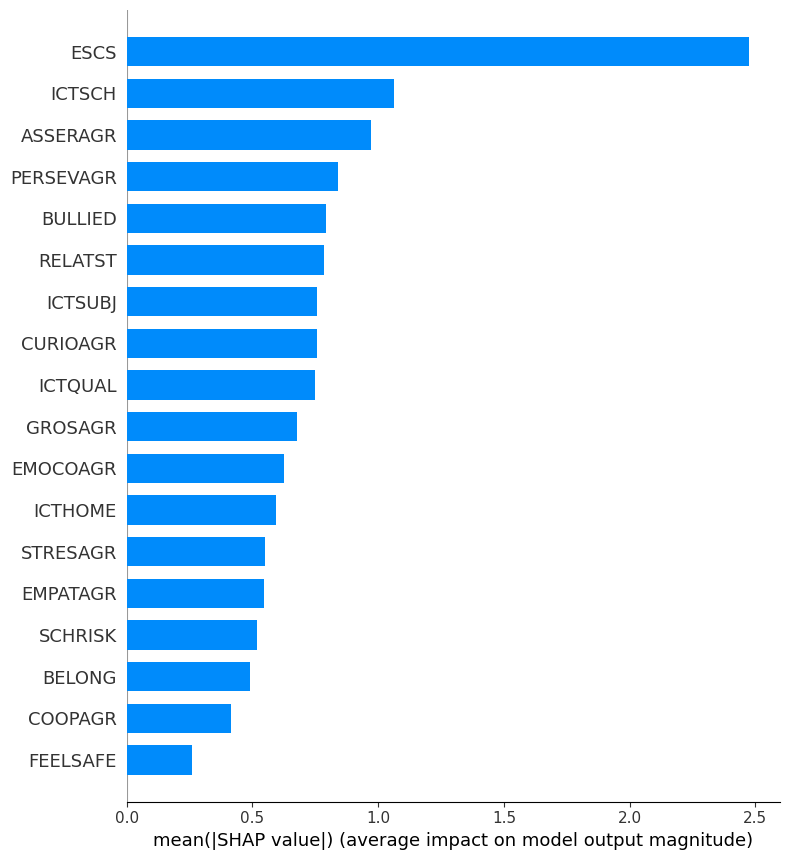

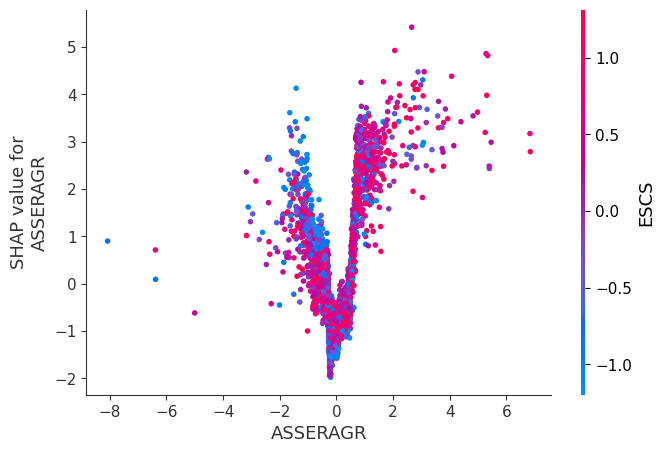

In [13]:
import pyreadstat
import pandas as pd
import os
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer
import numpy as np
import shap
import optuna
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import pickle

# Step 1: 定义文件名和变量列表
'''
abspath = os.path.abspath(__file__)
dname = os.path.dirname(abspath)
os.chdir(dname)
'''
sav_filename = "./Data/Finland/Finland_Male.sav"

variables_of_interest = [
    "ESCS", "RELATST", "BELONG", "BULLIED", "FEELSAFE", "SCHRISK", "PERSEVAGR",
    "CURIOAGR", "COOPAGR", "EMPATAGR", "ASSERAGR", "STRESAGR", "EMOCOAGR", "GROSAGR",
    "FAMSUP", "CREATEFF", "CREATSCH", "CREATFAM", "CREATAS", "CREATOOS", "CREATOP",
    "ICTSCH", "ICTHOME", "ICTQUAL", "ICTSUBJ", "ICTENQ", "ICTFEED", "ICTOUT", "ICTWKDY",
    "ICTWKEND", "ICTREG", "ICTINFO", "ICTEFFIC"
]

target_variable = "PV1CRTH_NC"

# Step 2: 读取数据
df, meta = pyreadstat.read_sav(sav_filename)

selected_columns = variables_of_interest + [target_variable]
missing_columns = [col for col in selected_columns if col not in df.columns]

if len(missing_columns) > 0:
    print("Missing columns:", missing_columns)
else:
    df_filtered = df[selected_columns]
    print("Filtered data shape:", df_filtered.shape)
    print(df_filtered.head())
    print(df_filtered.isnull().sum())

    # Step 4: 缺失值处理
    missing_counts = df_filtered.isnull().sum()

    # 计算总数据的 20%
    total_rows = df_filtered.shape[0]
    threshold = total_rows * 0.2  # 20%的阈值

    # 删除缺失值超过总数据 20% 的列
    cols_to_drop = missing_counts[missing_counts > threshold].index.tolist()
    if len(cols_to_drop) > 0:
        print("Dropping columns with more than 20% missing values:", cols_to_drop)
        df_filtered = df_filtered.drop(columns=cols_to_drop)
    else:
        print("No columns dropped.")

    print("Missing after drop:")
    print(df_filtered.isnull().sum())

    # 对剩余的缺失值进行 KNN 插补
    remaining_missing = df_filtered.isnull().sum()
    columns_with_missing = remaining_missing[remaining_missing > 0].index

    # 创建 KNN 插补器，n_neighbors 参数指定使用多少个邻居进行插补
    knn_imputer = KNNImputer(n_neighbors=5)

    # 对缺失值进行插补
    df_filtered[columns_with_missing] = knn_imputer.fit_transform(df_filtered[columns_with_missing])

    print("Missing after KNN imputation:")
    print(df_filtered.isnull().sum())

    # Step 5: 划分数据集
    X = df_filtered.drop(columns=[target_variable])
    y = df_filtered[target_variable]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Training set shape:", X_train.shape)
    print("Test set shape:", X_test.shape)

    # **新增** 使用手动交叉验证和Optuna对XGBoost进行超参数调优
    def objective(trial):
        # 定义贝叶斯优化的超参数空间
        param = {
            'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
            'max_depth': trial.suggest_int('max_depth', 5, 25),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
            'subsample': trial.suggest_float('subsample', 0.5, 0.9),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 0.9),
            'alpha': trial.suggest_float('alpha', 0, 0.1),
            'lambda': trial.suggest_float('lambda', 0, 0.1),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
            'gamma': trial.suggest_float('gamma', 0, 0.5),
            'device': 'cuda',  # 使用CUDA设备
            'eval_metric': 'rmse',  # 初始化时指定评估指标
            'early_stopping_rounds': 50
        }

        model = XGBRegressor(**param)

        # 手动进行交叉验证
        kf = KFold(n_splits=10, shuffle=True, random_state=42)
        r2_scores = []

        for train_idx, val_idx in kf.split(X_train):
            X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

            model.fit(X_train_cv, y_train_cv, eval_set=[(X_val_cv, y_val_cv)], verbose=False)
            y_pred = model.predict(X_val_cv)
            r2_scores.append(r2_score(y_val_cv, y_pred))

        return np.mean(r2_scores)

    # 创建并运行Optuna优化，目标是最大化R²
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100)

    print("Best hyperparameters:", study.best_params)
    print("Best R²:", study.best_value)

    # 获取最佳超参数并训练最佳模型
    best_params = study.best_params
    best_model = XGBRegressor(**best_params)
    best_model.fit(X_train, y_train)

    # 使用最佳模型在测试集评估
    y_pred = best_model.predict(X_test)

    # 计算测试集上的MSE和R²
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("MSE on test set with tuned model:", mse)
    print("R² on test set with tuned model:", r2)

    # 保存最佳模型
    with open('Finland_Male.pkl', 'wb') as f:
      pickle.dump(best_model, f)

    # Step 6: SHAP分析
    '''
    feature_name_map = {
        "ESCS": "Index of economic, social and cultural status",
        "RELATST": "Quality of student-teacher relationships",
        "BELONG": "Sense of belonging",
        "BULLIED": "Being bullied",
        "FEELSAFE": "Feeling safe",
        "SCHRISK": "School safety risks",
        "PERSEVAGR": "Perseverance (agreement) (WLE)",
        "CURIOAGR": "Curiosity (agreement) (WLE)",
        "COOPAGR": "Cooperation (agreement) (WLE)",
        "EMPATAGR": "Empathy (agreement) (WLE)",
        "ASSERAGR": "Assertiveness (agreement) (WLE)",
        "STRESAGR": "Stress resistance (agreement) (WLE)",
        "EMOCOAGR": "Emotional control (agreement) (WLE)",
        "GROSAGR": "Growth Mindset (WLE)",
        "FAMSUP": "Family support (WLE)",
        "CREATEFF": "Creative self-efficacy (WLE)",
        "CREATSCH": "Creative school and class environment (WLE)",
        "CREATFAM": "Creative peers and family environment (WLE)",
        "CREATAS": "Creative Activities at school (WLE)",
        "CREATOOS": "Creative Activities outside of school (WLE)",
        "CREATOP": "Creativity and Openness to Intellect TBD (WLE)",
        "ICTSCH": "ICT availability at school (WLE)",
        "ICTHOME": "ICT availability outside of school (WLE)",
        "ICTQUAL": "Quality of access to ICT (WLE)",
        "ICTSUBJ": "Subject-related ICT Use During Lessons (WLE)",
        "ICTENQ": "Use of ICT in enquiry-based learning activities (WLE)",
        "ICTFEED": "Support or feedback via ICT (WLE)",
        "ICTOUT": "Use of ICT for school activities outside of the classroom (WLE)",
        "ICTWKDY": "Frequency of ICT activity (weekday) (WLE)",
        "ICTWKEND": "Frequency of ICT activity (weekend) (WLE)",
        "ICTREG": "Views of regulated ICT use in school (WLE)",
        "ICTINFO": "Students’ practices regarding online information (WLE)",
        "ICTEFFIC": "Self-efficacy in digital competencies (WLE)"
    }
    '''

    # 将数据集列名映射为详细描述
    # X_train_renamed = X_train.rename(columns=feature_name_map)

    # 基于训练好的最优模型进行SHAP值分析
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_train)

    # 全局特征重要度可视化 (summary_plot)
    shap.summary_plot(shap_values, X_train, plot_type="dot")

    # 展示特征重要性 (bar plot)
    shap.summary_plot(shap_values, X_train, plot_type="bar")

    # 查看单个特征的依赖关系图
    shap.dependence_plot("ASSERAGR", shap_values, X_train)

Filtered data shape: (10239, 34)
     ESCS  RELATST  BELONG  BULLIED  FEELSAFE  SCHRISK  PERSEVAGR  CURIOAGR  \
0 -0.5625  -0.6807 -0.3128   0.5504    0.4417   2.3555    -0.4855   -0.5930   
1  1.1134  -0.6217  0.1832   1.3081    0.4938   1.6186     0.4433    1.5795   
2  1.1087   0.0780 -0.4986  -1.2280    0.6942   0.1810     0.1005   -0.3095   
3  0.7076  -0.7900 -0.3261  -1.2280    0.4417   0.1810     0.0772   -1.1450   
4  0.3183   0.8815  0.5453  -1.2280   -0.7560   1.1800     0.2848    0.0869   

   COOPAGR  EMPATAGR  ...  ICTSUBJ  ICTENQ  ICTFEED  ICTOUT  ICTWKDY  \
0  -0.7553    3.1218  ...   0.0119 -0.3584   0.3074 -0.9795   0.4639   
1      NaN   -0.0536  ...   0.2133  0.6405   0.4521  0.0433   0.4639   
2   0.2600    0.4922  ...  -0.7335 -0.4352  -0.2822 -0.6663  -0.1564   
3  -0.5126    0.9518  ...   0.3155  0.6812  -0.2822  0.2954   0.5601   
4  -0.4394   -0.8087  ...   0.3804  0.3541  -0.7918  0.9041   0.8854   

   ICTWKEND  ICTREG  ICTINFO  ICTEFFIC  PV1CRTH_NC  
0    0

[I 2024-12-19 12:37:02,146] A new study created in memory with name: no-name-4c238068-4446-452f-9770-c6c11391ac5d


Missing after KNN imputation:
ESCS          0
RELATST       0
BELONG        0
BULLIED       0
FEELSAFE      0
SCHRISK       0
PERSEVAGR     0
CURIOAGR      0
COOPAGR       0
EMPATAGR      0
ASSERAGR      0
STRESAGR      0
EMOCOAGR      0
GROSAGR       0
CREATEFF      0
CREATSCH      0
ICTSCH        0
ICTHOME       0
ICTQUAL       0
ICTSUBJ       0
ICTENQ        0
ICTFEED       0
ICTOUT        0
ICTWKDY       0
PV1CRTH_NC    0
dtype: int64
Training set shape: (8191, 24)
Test set shape: (2048, 24)


[I 2024-12-19 12:37:09,130] Trial 0 finished with value: 0.050334965016520995 and parameters: {'n_estimators': 1435, 'max_depth': 18, 'learning_rate': 0.5024187451732509, 'subsample': 0.6746036188292543, 'colsample_bytree': 0.8862042935023116, 'alpha': 0.08935206262013759, 'lambda': 0.034414692553607976, 'min_child_weight': 1, 'gamma': 0.3687052402570403}. Best is trial 0 with value: 0.050334965016520995.
[I 2024-12-19 12:37:16,215] Trial 1 finished with value: -0.09735469760922597 and parameters: {'n_estimators': 590, 'max_depth': 16, 'learning_rate': 0.7763485808671268, 'subsample': 0.589336677919388, 'colsample_bytree': 0.7057881166184298, 'alpha': 0.03875823410810149, 'lambda': 0.08250208833988305, 'min_child_weight': 2, 'gamma': 0.4909658538258887}. Best is trial 0 with value: 0.050334965016520995.
[I 2024-12-19 12:37:20,292] Trial 2 finished with value: -0.02425263107705672 and parameters: {'n_estimators': 679, 'max_depth': 17, 'learning_rate': 0.7244374044673796, 'subsample': 0.

Best hyperparameters: {'n_estimators': 1701, 'max_depth': 5, 'learning_rate': 0.010696946912012999, 'subsample': 0.8429140262751094, 'colsample_bytree': 0.7199729112638379, 'alpha': 0.01776096068211499, 'lambda': 0.010737647187615464, 'min_child_weight': 2, 'gamma': 0.41773598726654626}
Best R²: 0.35116017657121473
MSE on test set with tuned model: 102.30063089248131
R² on test set with tuned model: 0.31798562213806925


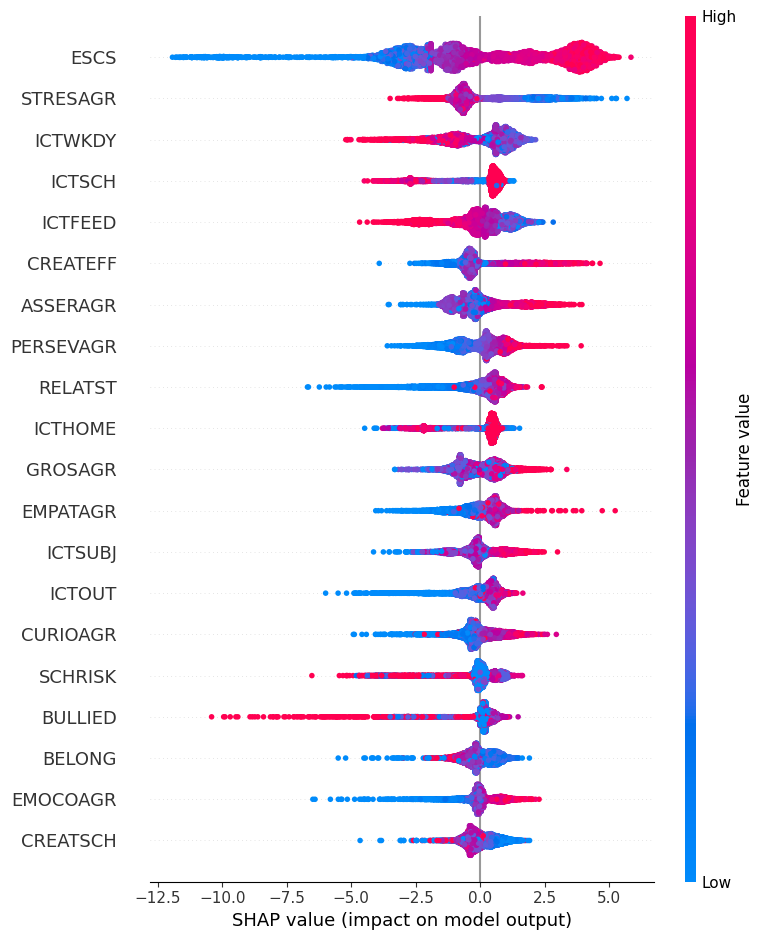

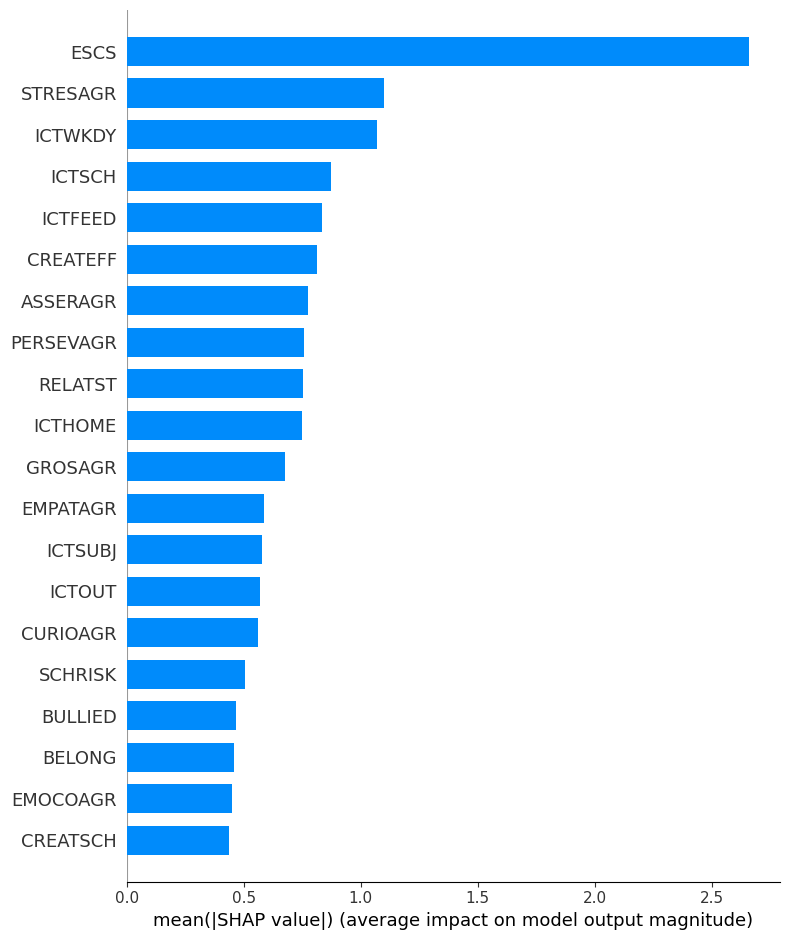

ValueError: Could not find feature named: ICTEFFIC

In [12]:
import pyreadstat
import pandas as pd
import os
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer
import numpy as np
import shap
import optuna
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import pickle

# Step 1: 定义文件名和变量列表
'''
abspath = os.path.abspath(__file__)
dname = os.path.dirname(abspath)
os.chdir(dname)
'''
sav_filename = "./Data/Finland/Finland.sav"

variables_of_interest = [
    "ESCS", "RELATST", "BELONG", "BULLIED", "FEELSAFE", "SCHRISK", "PERSEVAGR",
    "CURIOAGR", "COOPAGR", "EMPATAGR", "ASSERAGR", "STRESAGR", "EMOCOAGR", "GROSAGR",
    "FAMSUP", "CREATEFF", "CREATSCH", "CREATFAM", "CREATAS", "CREATOOS", "CREATOP",
    "ICTSCH", "ICTHOME", "ICTQUAL", "ICTSUBJ", "ICTENQ", "ICTFEED", "ICTOUT", "ICTWKDY",
    "ICTWKEND", "ICTREG", "ICTINFO", "ICTEFFIC"
]

target_variable = "PV1CRTH_NC"

# Step 2: 读取数据
df, meta = pyreadstat.read_sav(sav_filename)

selected_columns = variables_of_interest + [target_variable]
missing_columns = [col for col in selected_columns if col not in df.columns]

if len(missing_columns) > 0:
    print("Missing columns:", missing_columns)
else:
    df_filtered = df[selected_columns]
    print("Filtered data shape:", df_filtered.shape)
    print(df_filtered.head())
    print(df_filtered.isnull().sum())

    # Step 4: 缺失值处理
    missing_counts = df_filtered.isnull().sum()

    # 计算总数据的 20%
    total_rows = df_filtered.shape[0]
    threshold = total_rows * 0.2  # 20%的阈值

    # 删除缺失值超过总数据 20% 的列
    cols_to_drop = missing_counts[missing_counts > threshold].index.tolist()
    if len(cols_to_drop) > 0:
        print("Dropping columns with more than 20% missing values:", cols_to_drop)
        df_filtered = df_filtered.drop(columns=cols_to_drop)
    else:
        print("No columns dropped.")

    print("Missing after drop:")
    print(df_filtered.isnull().sum())

    # 对剩余的缺失值进行 KNN 插补
    remaining_missing = df_filtered.isnull().sum()
    columns_with_missing = remaining_missing[remaining_missing > 0].index

    # 创建 KNN 插补器，n_neighbors 参数指定使用多少个邻居进行插补
    knn_imputer = KNNImputer(n_neighbors=5)

    # 对缺失值进行插补
    df_filtered[columns_with_missing] = knn_imputer.fit_transform(df_filtered[columns_with_missing])

    print("Missing after KNN imputation:")
    print(df_filtered.isnull().sum())

    # Step 5: 划分数据集
    X = df_filtered.drop(columns=[target_variable])
    y = df_filtered[target_variable]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Training set shape:", X_train.shape)
    print("Test set shape:", X_test.shape)

    # **新增** 使用手动交叉验证和Optuna对XGBoost进行超参数调优
    def objective(trial):
        # 定义贝叶斯优化的超参数空间
        param = {
            'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
            'max_depth': trial.suggest_int('max_depth', 5, 25),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
            'subsample': trial.suggest_float('subsample', 0.5, 0.9),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 0.9),
            'alpha': trial.suggest_float('alpha', 0, 0.1),
            'lambda': trial.suggest_float('lambda', 0, 0.1),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
            'gamma': trial.suggest_float('gamma', 0, 0.5),
            'device': 'cuda',  # 使用CUDA设备
            'eval_metric': 'rmse',  # 初始化时指定评估指标
            'early_stopping_rounds': 50
        }

        model = XGBRegressor(**param)

        # 手动进行交叉验证
        kf = KFold(n_splits=10, shuffle=True, random_state=42)
        r2_scores = []

        for train_idx, val_idx in kf.split(X_train):
            X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

            model.fit(X_train_cv, y_train_cv, eval_set=[(X_val_cv, y_val_cv)], verbose=False)
            y_pred = model.predict(X_val_cv)
            r2_scores.append(r2_score(y_val_cv, y_pred))

        return np.mean(r2_scores)

    # 创建并运行Optuna优化，目标是最大化R²
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100)

    print("Best hyperparameters:", study.best_params)
    print("Best R²:", study.best_value)

    # 获取最佳超参数并训练最佳模型
    best_params = study.best_params
    best_model = XGBRegressor(**best_params)
    best_model.fit(X_train, y_train)

    # 使用最佳模型在测试集评估
    y_pred = best_model.predict(X_test)

    # 计算测试集上的MSE和R²
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("MSE on test set with tuned model:", mse)
    print("R² on test set with tuned model:", r2)

    # 保存最佳模型
    with open('Finland.pkl', 'wb') as f:
      pickle.dump(best_model, f)

    # Step 6: SHAP分析
    '''
    feature_name_map = {
        "ESCS": "Index of economic, social and cultural status",
        "RELATST": "Quality of student-teacher relationships",
        "BELONG": "Sense of belonging",
        "BULLIED": "Being bullied",
        "FEELSAFE": "Feeling safe",
        "SCHRISK": "School safety risks",
        "PERSEVAGR": "Perseverance (agreement) (WLE)",
        "CURIOAGR": "Curiosity (agreement) (WLE)",
        "COOPAGR": "Cooperation (agreement) (WLE)",
        "EMPATAGR": "Empathy (agreement) (WLE)",
        "ASSERAGR": "Assertiveness (agreement) (WLE)",
        "STRESAGR": "Stress resistance (agreement) (WLE)",
        "EMOCOAGR": "Emotional control (agreement) (WLE)",
        "GROSAGR": "Growth Mindset (WLE)",
        "FAMSUP": "Family support (WLE)",
        "CREATEFF": "Creative self-efficacy (WLE)",
        "CREATSCH": "Creative school and class environment (WLE)",
        "CREATFAM": "Creative peers and family environment (WLE)",
        "CREATAS": "Creative Activities at school (WLE)",
        "CREATOOS": "Creative Activities outside of school (WLE)",
        "CREATOP": "Creativity and Openness to Intellect TBD (WLE)",
        "ICTSCH": "ICT availability at school (WLE)",
        "ICTHOME": "ICT availability outside of school (WLE)",
        "ICTQUAL": "Quality of access to ICT (WLE)",
        "ICTSUBJ": "Subject-related ICT Use During Lessons (WLE)",
        "ICTENQ": "Use of ICT in enquiry-based learning activities (WLE)",
        "ICTFEED": "Support or feedback via ICT (WLE)",
        "ICTOUT": "Use of ICT for school activities outside of the classroom (WLE)",
        "ICTWKDY": "Frequency of ICT activity (weekday) (WLE)",
        "ICTWKEND": "Frequency of ICT activity (weekend) (WLE)",
        "ICTREG": "Views of regulated ICT use in school (WLE)",
        "ICTINFO": "Students’ practices regarding online information (WLE)",
        "ICTEFFIC": "Self-efficacy in digital competencies (WLE)"
    }
    '''

    # 将数据集列名映射为详细描述
    # X_train_renamed = X_train.rename(columns=feature_name_map)

    # 基于训练好的最优模型进行SHAP值分析
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_train)

    # 全局特征重要度可视化 (summary_plot)
    shap.summary_plot(shap_values, X_train, plot_type="dot")

    # 展示特征重要性 (bar plot)
    shap.summary_plot(shap_values, X_train, plot_type="bar")

    # 查看单个特征的依赖关系图
    shap.dependence_plot("ICTEFFIC", shap_values, X_train)

Filtered data shape: (4995, 34)
     ESCS  RELATST  BELONG  BULLIED  FEELSAFE  SCHRISK  PERSEVAGR  CURIOAGR  \
0 -0.5625  -0.6807 -0.3128   0.5504    0.4417   2.3555    -0.4855   -0.5930   
1  1.1087   0.0780 -0.4986  -1.2280    0.6942   0.1810     0.1005   -0.3095   
2  0.7076  -0.7900 -0.3261  -1.2280    0.4417   0.1810     0.0772   -1.1450   
3  1.2078  -0.6725 -0.3128  -0.2670   -0.7560  -0.6386    -0.0362   -0.9980   
4  1.1908   0.0121 -0.7731  -1.2280   -0.7560  -0.6386     0.2044   -0.5197   

   COOPAGR  EMPATAGR  ...  ICTSUBJ  ICTENQ  ICTFEED  ICTOUT  ICTWKDY  \
0  -0.7553    3.1218  ...   0.0119 -0.3584   0.3074 -0.9795   0.4639   
1   0.2600    0.4922  ...  -0.7335 -0.4352  -0.2822 -0.6663  -0.1564   
2  -0.5126    0.9518  ...   0.3155  0.6812  -0.2822  0.2954   0.5601   
3  -0.9753   -0.9900  ...   0.2168  0.2279  -0.3565  1.1704   0.1395   
4   0.0865    0.6195  ...      NaN     NaN      NaN     NaN      NaN   

   ICTWKEND  ICTREG  ICTINFO  ICTEFFIC  PV1CRTH_NC  
0    0.

[I 2024-12-19 13:27:39,818] A new study created in memory with name: no-name-cd8525e8-35ef-43bc-8a72-e7f6bf8efef7


Missing after KNN imputation:
ESCS          0
RELATST       0
BELONG        0
BULLIED       0
FEELSAFE      0
SCHRISK       0
PERSEVAGR     0
CURIOAGR      0
COOPAGR       0
EMPATAGR      0
ASSERAGR      0
STRESAGR      0
EMOCOAGR      0
GROSAGR       0
FAMSUP        0
CREATEFF      0
CREATSCH      0
CREATFAM      0
CREATOP       0
ICTSCH        0
ICTHOME       0
ICTQUAL       0
ICTSUBJ       0
ICTENQ        0
ICTFEED       0
ICTOUT        0
ICTWKDY       0
ICTWKEND      0
ICTREG        0
PV1CRTH_NC    0
dtype: int64
Training set shape: (3996, 29)
Test set shape: (999, 29)


[I 2024-12-19 13:27:44,483] Trial 0 finished with value: 0.007883825750586205 and parameters: {'n_estimators': 1183, 'max_depth': 21, 'learning_rate': 0.6992092026497393, 'subsample': 0.6058476276227416, 'colsample_bytree': 0.7887087971332691, 'alpha': 0.02523566074546392, 'lambda': 0.00715065516997796, 'min_child_weight': 5, 'gamma': 0.2616873765795404}. Best is trial 0 with value: 0.007883825750586205.
[I 2024-12-19 13:27:59,932] Trial 1 finished with value: 0.25530471580484515 and parameters: {'n_estimators': 545, 'max_depth': 23, 'learning_rate': 0.08072879730157208, 'subsample': 0.7650952313627741, 'colsample_bytree': 0.5589649984240956, 'alpha': 0.022970880978841368, 'lambda': 0.050630482978852545, 'min_child_weight': 4, 'gamma': 0.22378156721319103}. Best is trial 1 with value: 0.25530471580484515.
[I 2024-12-19 13:28:11,744] Trial 2 finished with value: 0.27192403353387895 and parameters: {'n_estimators': 1385, 'max_depth': 11, 'learning_rate': 0.07207875601605292, 'subsample':

Best hyperparameters: {'n_estimators': 650, 'max_depth': 14, 'learning_rate': 0.011185982241808149, 'subsample': 0.5568681440872985, 'colsample_bytree': 0.5438363208565258, 'alpha': 0.09623939881436981, 'lambda': 0.009719580376056077, 'min_child_weight': 4, 'gamma': 0.13518018977069757}
Best R²: 0.31053130013722796
MSE on test set with tuned model: 88.68124188862909
R² on test set with tuned model: 0.32653631729906585


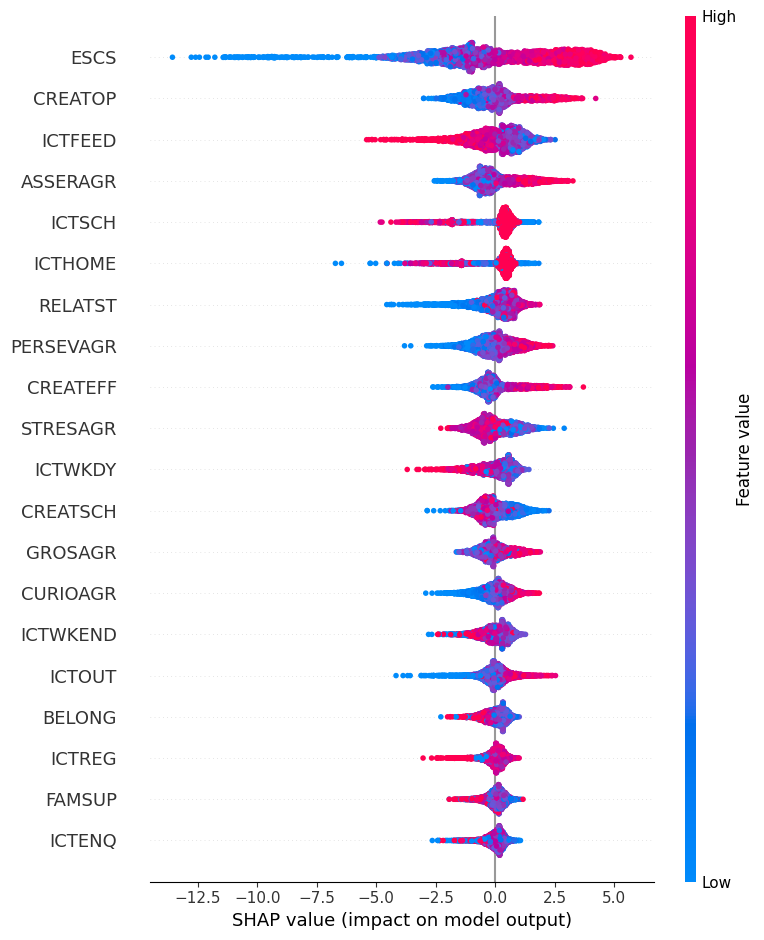

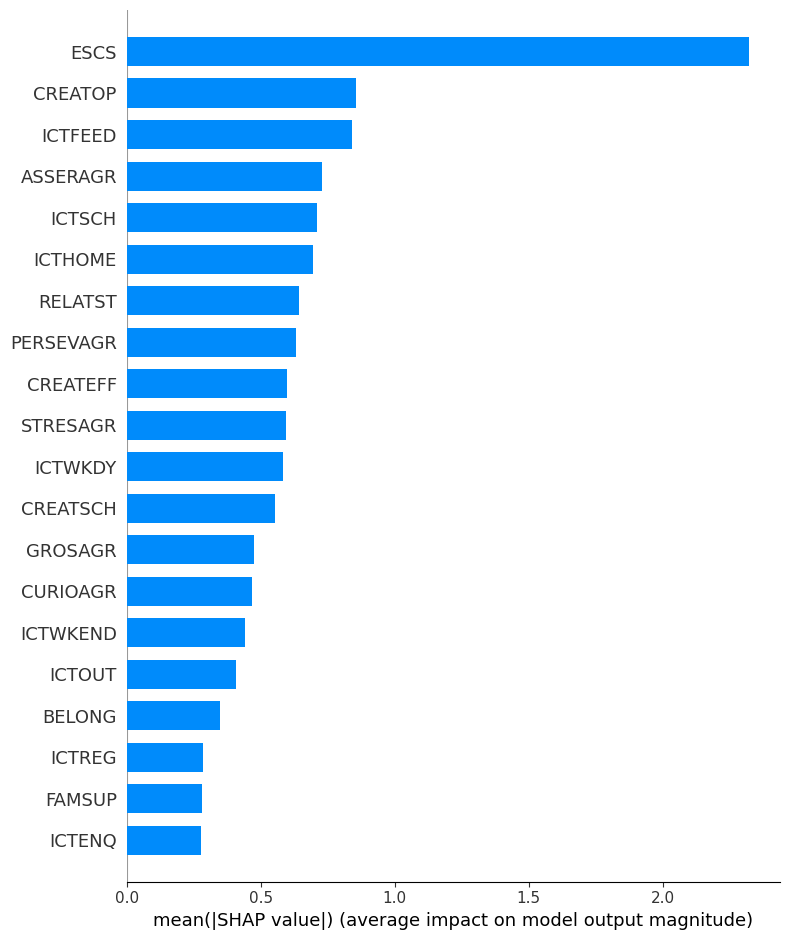

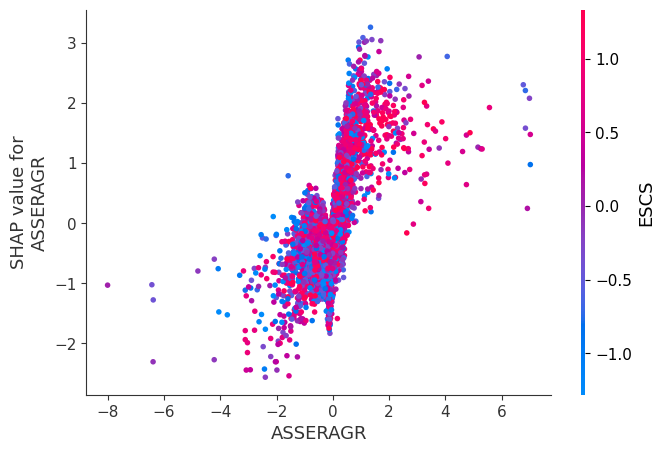

In [14]:
import pyreadstat
import pandas as pd
import os
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer
import numpy as np
import shap
import optuna
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import pickle

# Step 1: 定义文件名和变量列表
'''
abspath = os.path.abspath(__file__)
dname = os.path.dirname(abspath)
os.chdir(dname)
'''
sav_filename = "./Data/Finland/Finland_Female.sav"

variables_of_interest = [
    "ESCS", "RELATST", "BELONG", "BULLIED", "FEELSAFE", "SCHRISK", "PERSEVAGR",
    "CURIOAGR", "COOPAGR", "EMPATAGR", "ASSERAGR", "STRESAGR", "EMOCOAGR", "GROSAGR",
    "FAMSUP", "CREATEFF", "CREATSCH", "CREATFAM", "CREATAS", "CREATOOS", "CREATOP",
    "ICTSCH", "ICTHOME", "ICTQUAL", "ICTSUBJ", "ICTENQ", "ICTFEED", "ICTOUT", "ICTWKDY",
    "ICTWKEND", "ICTREG", "ICTINFO", "ICTEFFIC"
]

target_variable = "PV1CRTH_NC"

# Step 2: 读取数据
df, meta = pyreadstat.read_sav(sav_filename)

selected_columns = variables_of_interest + [target_variable]
missing_columns = [col for col in selected_columns if col not in df.columns]

if len(missing_columns) > 0:
    print("Missing columns:", missing_columns)
else:
    df_filtered = df[selected_columns]
    print("Filtered data shape:", df_filtered.shape)
    print(df_filtered.head())
    print(df_filtered.isnull().sum())

    # Step 4: 缺失值处理
    missing_counts = df_filtered.isnull().sum()

    # 计算总数据的 20%
    total_rows = df_filtered.shape[0]
    threshold = total_rows * 0.2  # 20%的阈值

    # 删除缺失值超过总数据 20% 的列
    cols_to_drop = missing_counts[missing_counts > threshold].index.tolist()
    if len(cols_to_drop) > 0:
        print("Dropping columns with more than 20% missing values:", cols_to_drop)
        df_filtered = df_filtered.drop(columns=cols_to_drop)
    else:
        print("No columns dropped.")

    print("Missing after drop:")
    print(df_filtered.isnull().sum())

    # 对剩余的缺失值进行 KNN 插补
    remaining_missing = df_filtered.isnull().sum()
    columns_with_missing = remaining_missing[remaining_missing > 0].index

    # 创建 KNN 插补器，n_neighbors 参数指定使用多少个邻居进行插补
    knn_imputer = KNNImputer(n_neighbors=5)

    # 对缺失值进行插补
    df_filtered[columns_with_missing] = knn_imputer.fit_transform(df_filtered[columns_with_missing])

    print("Missing after KNN imputation:")
    print(df_filtered.isnull().sum())

    # Step 5: 划分数据集
    X = df_filtered.drop(columns=[target_variable])
    y = df_filtered[target_variable]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Training set shape:", X_train.shape)
    print("Test set shape:", X_test.shape)

    # **新增** 使用手动交叉验证和Optuna对XGBoost进行超参数调优
    def objective(trial):
        # 定义贝叶斯优化的超参数空间
        param = {
            'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
            'max_depth': trial.suggest_int('max_depth', 5, 25),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
            'subsample': trial.suggest_float('subsample', 0.5, 0.9),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 0.9),
            'alpha': trial.suggest_float('alpha', 0, 0.1),
            'lambda': trial.suggest_float('lambda', 0, 0.1),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
            'gamma': trial.suggest_float('gamma', 0, 0.5),
            'device': 'cuda',  # 使用CUDA设备
            'eval_metric': 'rmse',  # 初始化时指定评估指标
            'early_stopping_rounds': 50
        }

        model = XGBRegressor(**param)

        # 手动进行交叉验证
        kf = KFold(n_splits=10, shuffle=True, random_state=42)
        r2_scores = []

        for train_idx, val_idx in kf.split(X_train):
            X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

            model.fit(X_train_cv, y_train_cv, eval_set=[(X_val_cv, y_val_cv)], verbose=False)
            y_pred = model.predict(X_val_cv)
            r2_scores.append(r2_score(y_val_cv, y_pred))

        return np.mean(r2_scores)

    # 创建并运行Optuna优化，目标是最大化R²
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100)

    print("Best hyperparameters:", study.best_params)
    print("Best R²:", study.best_value)

    # 获取最佳超参数并训练最佳模型
    best_params = study.best_params
    best_model = XGBRegressor(**best_params)
    best_model.fit(X_train, y_train)

    # 使用最佳模型在测试集评估
    y_pred = best_model.predict(X_test)

    # 计算测试集上的MSE和R²
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("MSE on test set with tuned model:", mse)
    print("R² on test set with tuned model:", r2)

    # 保存最佳模型
    with open('Finland_Female.pkl', 'wb') as f:
      pickle.dump(best_model, f)

    # Step 6: SHAP分析
    '''
    feature_name_map = {
        "ESCS": "Index of economic, social and cultural status",
        "RELATST": "Quality of student-teacher relationships",
        "BELONG": "Sense of belonging",
        "BULLIED": "Being bullied",
        "FEELSAFE": "Feeling safe",
        "SCHRISK": "School safety risks",
        "PERSEVAGR": "Perseverance (agreement) (WLE)",
        "CURIOAGR": "Curiosity (agreement) (WLE)",
        "COOPAGR": "Cooperation (agreement) (WLE)",
        "EMPATAGR": "Empathy (agreement) (WLE)",
        "ASSERAGR": "Assertiveness (agreement) (WLE)",
        "STRESAGR": "Stress resistance (agreement) (WLE)",
        "EMOCOAGR": "Emotional control (agreement) (WLE)",
        "GROSAGR": "Growth Mindset (WLE)",
        "FAMSUP": "Family support (WLE)",
        "CREATEFF": "Creative self-efficacy (WLE)",
        "CREATSCH": "Creative school and class environment (WLE)",
        "CREATFAM": "Creative peers and family environment (WLE)",
        "CREATAS": "Creative Activities at school (WLE)",
        "CREATOOS": "Creative Activities outside of school (WLE)",
        "CREATOP": "Creativity and Openness to Intellect TBD (WLE)",
        "ICTSCH": "ICT availability at school (WLE)",
        "ICTHOME": "ICT availability outside of school (WLE)",
        "ICTQUAL": "Quality of access to ICT (WLE)",
        "ICTSUBJ": "Subject-related ICT Use During Lessons (WLE)",
        "ICTENQ": "Use of ICT in enquiry-based learning activities (WLE)",
        "ICTFEED": "Support or feedback via ICT (WLE)",
        "ICTOUT": "Use of ICT for school activities outside of the classroom (WLE)",
        "ICTWKDY": "Frequency of ICT activity (weekday) (WLE)",
        "ICTWKEND": "Frequency of ICT activity (weekend) (WLE)",
        "ICTREG": "Views of regulated ICT use in school (WLE)",
        "ICTINFO": "Students’ practices regarding online information (WLE)",
        "ICTEFFIC": "Self-efficacy in digital competencies (WLE)"
    }
    '''

    # 将数据集列名映射为详细描述
    # X_train_renamed = X_train.rename(columns=feature_name_map)

    # 基于训练好的最优模型进行SHAP值分析
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_train)

    # 全局特征重要度可视化 (summary_plot)
    shap.summary_plot(shap_values, X_train, plot_type="dot")

    # 展示特征重要性 (bar plot)
    shap.summary_plot(shap_values, X_train, plot_type="bar")

    # 查看单个特征的依赖关系图
    shap.dependence_plot("ASSERAGR", shap_values, X_train)

In [15]:
!git clone https://github.com/MoqiSheng/MoqiSheng.github.io.git

Cloning into 'MoqiSheng.github.io'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 45 (delta 23), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (45/45), 3.25 MiB | 7.32 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [16]:
%cd MoqiSheng.github.io

/content/MoqiSheng.github.io


In [17]:
import os
notebook_name = os.path.basename(os.path.splitext(os.path.abspath(''))[0]) + '.ipynb'
print(notebook_name)

MoqiSheng.github.ipynb
